In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates



In [2]:
stream_file_path = "Stream data.xlsx"
stream_data = pd.read_excel(stream_file_path, engine='openpyxl')
print(stream_data.iloc[:10, 5])  # First 10 rows, first 10 columns

0    440424.382
1    444172.076
2    519503.259
3    487604.940
4    606794.981
5    705035.506
6    757101.765
7    456433.794
8    676192.258
9    646846.514
Name: 0000 Ring Main #3  - kWh, dtype: float64


castle_file_path = "192 Castle street.xlsx"
castle_data = pd.read_excel(castle_file_path, engine='openpyxl')
print(castle_data .iloc[:10, 5])  # First 10 rows, first 10 columns

janitza_file_path = "Janitza Reading.xlsx"
janitza_data = pd.read_excel(janitza_file_path, engine='openpyxl')
print(janitza_data .iloc[:10, 5])  # First 10 rows, first 10 columns

gas_file_path = "Gas Data.xlsx"
gas_data = pd.read_excel(gas_file_path, engine='openpyxl')
print(gas_data.iloc[:10, 0])  # 9 to 19 (Python uses zero-based indexing)

cfi_file_path = "CFI.xlsx"
cfi_data = pd.read_excel(cfi_file_path , engine='openpyxl')
print(cfi_data.iloc[:10, 9:20])  # 9 to 19 (Python uses zero-based indexing)

In [7]:
# ------- 🔍 Remove All "PF" Columns (Power Factor) ---------
pf_columns = [col for col in stream_data.columns if "PF" in col]
stream_data_filtered = stream_data.drop(columns=pf_columns)

In [8]:
print("\n✅ Removed Power Factor (PF) Columns. Remaining Columns:")
print(stream_data_filtered.columns)


✅ Removed Power Factor (PF) Columns. Remaining Columns:
Index(['Date', '0000 Ring Main #1 MP4889 - kWh', '0000 Ring Main #2  - kWh',
       '0000 Ring Main #3  - kWh', 'A161 Taieri Farm - kWh',
       'C405 192 Castle College - kWh', 'D20X Med School Sub Main - kWh',
       'D402 Hayward College - kWh', 'D403 Survey & Marine - kWh',
       'D40X Cumberland College - kWh', 'E201 School of Dentistry - kWh',
       'E212 Zoology Buildings - kWh', 'E214 Otago Dental School - kWh',
       'E301 Hunter Centre - kWh', 'E305 Physiotherapy - kWh',
       'E308 Student Health - kWh', 'E325 Research Support Facility - kWh',
       'E902 Hocken Library - kWh', 'F204 444 Great King Street - kWh',
       'F315 Botany Tin Hut - kWh', 'F325 Physical Education - kWh',
       'F711 Executive Residence - kWh', 'F812 UOCOE Owheo Building - kWh',
       'F813 UOCOE Robertson Library - kWh', 'F940 Plaza Building - kWh',
       'F9XX College of Education main (Boiler room) - kWh',
       'G401 Mellor Labora

In [9]:
# Basic Dataset Information
print("\n Basic Information:")
print(stream_data_filtered.info())


 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Date                                                36 non-null     object 
 1   0000 Ring Main #1 MP4889 - kWh                      35 non-null     float64
 2   0000 Ring Main #2  - kWh                            35 non-null     float64
 3   0000 Ring Main #3  - kWh                            35 non-null     float64
 4   A161 Taieri Farm - kWh                              35 non-null     float64
 5   C405 192 Castle College - kWh                       35 non-null     float64
 6   D20X Med School Sub Main - kWh                      35 non-null     float64
 7   D402 Hayward College - kWh                          35 non-null     float64
 8   D403 Survey & Marine - kWh                          35 non-nu

In [10]:
print("\n First Few Rows:")
print(stream_data_filtered.head())


 First Few Rows:
     Date  0000 Ring Main #1 MP4889 - kWh  0000 Ring Main #2  - kWh  \
0  jan 22                      251350.978                       0.0   
1  feb 22                      258506.224                       0.0   
2  mar 22                      305807.132                       0.0   
3  apr 22                      301477.281                       0.0   
4  may 22                      368266.870                       0.0   

   0000 Ring Main #3  - kWh  A161 Taieri Farm - kWh  \
0                440424.382                 5108.36   
1                444172.076                 4832.68   
2                519503.259                 5474.11   
3                487604.940                 6012.11   
4                606794.981                 3417.19   

   C405 192 Castle College - kWh  D20X Med School Sub Main - kWh  \
0                      11006.160                       327840.03   
1                      14045.024                       334840.35   
2                   

In [11]:
# Check for missing values
print("\n Missing Values in Each Column:")
print(stream_data_filtered.isnull().sum())


 Missing Values in Each Column:
Date                                                  39
0000 Ring Main #1 MP4889 - kWh                        40
0000 Ring Main #2  - kWh                              40
0000 Ring Main #3  - kWh                              40
A161 Taieri Farm - kWh                                40
C405 192 Castle College - kWh                         40
D20X Med School Sub Main - kWh                        40
D402 Hayward College - kWh                            40
D403 Survey & Marine - kWh                            40
D40X Cumberland College - kWh                         40
E201 School of Dentistry - kWh                        75
E212 Zoology Buildings - kWh                          40
E214 Otago Dental School - kWh                        40
E301 Hunter Centre - kWh                              40
E305 Physiotherapy - kWh                              40
E308 Student Health - kWh                             40
E325 Research Support Facility - kWh                  4

In [12]:
# Summary statistics after PF removal
print("\n📊 Summary Statistics:")
print(stream_data_filtered.describe())


📊 Summary Statistics:
       0000 Ring Main #1 MP4889 - kWh  0000 Ring Main #2  - kWh  \
count                       35.000000                 35.000000   
mean                    218377.356371               8475.225771   
std                      57390.667993              48834.970550   
min                     128801.481000                  0.000000   
25%                     177447.207000                  0.000000   
50%                     202655.105000                  0.000000   
75%                     254928.601000                  0.000000   
max                     368266.870000             289035.212000   

       0000 Ring Main #3  - kWh  A161 Taieri Farm - kWh  \
count                 35.000000               35.000000   
mean              594647.633657             3473.196000   
std               121479.610180              797.364857   
min               401875.122000             2566.770000   
25%               472980.518500             3060.350000   
50%               6

In [13]:
# Export the filtered stream data to a CSV file
stream_data_filtered.to_csv('stream_data_filtered.csv', index=False)


In [80]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('stream_data_filtered.csv')

# Drop the last column
df = df.iloc[:, :-1]

# Drop rows from index 36 onwards
df = df.iloc[:36]

# Fill empty cells with 0
df = df.fillna(0)

# Convert all columns to numeric (except Date) and round to 2 decimal points
numeric_columns = df.columns.drop('Date')
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').round(2)

# Create a list of month-year labels for 36 rows
month_labels = [f"{month}-{year}" for year in range(22, 25) for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']][:36]

# Replace the existing Date column with the new labels
df['Date'] = month_labels

# Save the processed DataFrame to a new CSV file
df.to_csv('processed_stream_data.csv', index=False)

print("CSV file has been processed and saved as 'processed_stream_data.csv'")


CSV file has been processed and saved as 'processed_stream_data.csv'


In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv('stream_data_filtered.csv')

# Drop all rows from row 37 onwards
filtered_data = data.iloc[:36]

# Drop the last two columns
modified_data = filtered_data.iloc[:, :-2]

# Convert all values to numeric, fill empty cells with 0, and round to 2 decimal points
modified_data = modified_data.apply(pd.to_numeric, errors='coerce').fillna(0).round(2)

# Save the modified dataset as a CSV file
modified_data.to_csv('Stream filtered new data.csv', index=False)


In [15]:
# Define column groups based on the screenshot
groups = {
    "Libraries": [
        "E902 Hocken Library - kWh", "F813 UOCOE Robertson Library - kWh",
        "D203 Sayers (at Adams) - kWh", "F813 Bill Robertson Library - kWh",
        "F419 ISB West Excludir - kWh", "F505 Richardson Library - kWh"
    ],
    "Colleges": [
        "C405 192 Castle College - kWh", "D402 Hayward College - kWh",
        "D40X Cumberland College - kWh", "F812 UOCOE Owheo Building - kWh",
        "G608 St Margarets College - kWh", "H41X Selwyn College - kWh E2",
        "H633 Arana College main - kWh", "H71X Studholm College - kWh E2",
        "J126 Carrington College (Kitchen/Dining) - kWh",
        "J14X Aquinas College - kWh", "J303 Caroline Freeman College - kWh",
        "K427 Abbey College - kWh"
    ],
    "Science": [
        "D403 Survey & Marine - kWh", "E212 Zoology Buildings - kWh",
        "F315 Botany Tin Hut - kWh", "F325 Physical Education - kWh",
        "F812 UOCOE Owheo Building - kWh", "G401 Mellor Laboratories - kWh",
        "G404 Microbiology - kWh", "G413 Science 2 - kWh",
        "J960 Portobello Marine Lab - kWh", "G505 Geology north:",
        "G505 Geology south:"
    ],
    "Health Science": [
        "A161 Taieri Farm - kWh", "D20X Med School Sub Main - kWh",
        "E214 Otago Dental School - kWh", "E301 Hunter Centre - kWh",
        "E305 Physiotherapy - kWh", "E325 Research Support Facility - kWh"
    ],
    "Humanities": [
        "F9XX College of Education main (Boiler room) - kWh",
        "F518 Arts 1 Submains MSB - kWh", "F516 97 Albany & F517 99 Albany - kWh",
        "F505 1 Richardson Mains - kWh", "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh"
    ],
    "Commerce": [
        "F614 1 School of Business Incomer 1 (Lower floors) - kWh",
        "F614 2 School of Business Incomer 2 (Upper floors) - kWh",
        "F618 1 Psychology substation - Goddard - kWh"
    ],
    "Total Electricity": [
        "Total Stream DN Electricity - kWh"
    ],
    "ITS Servers": [
        "F204 444 Great King Street - kWh", "325 Gt King Server (325-PHYS) - kWh"
    ]
}

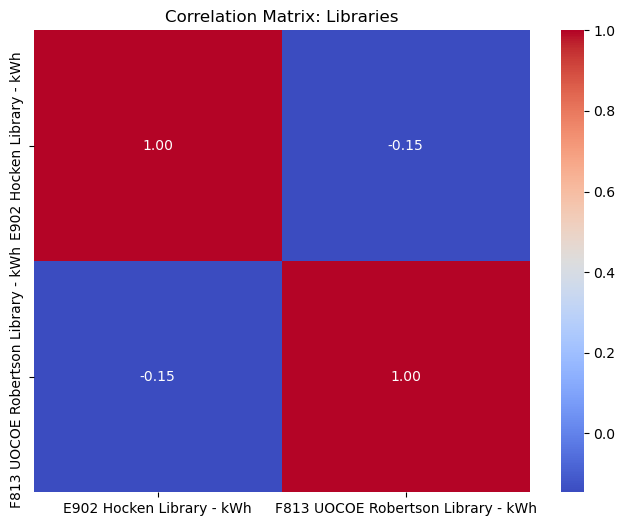

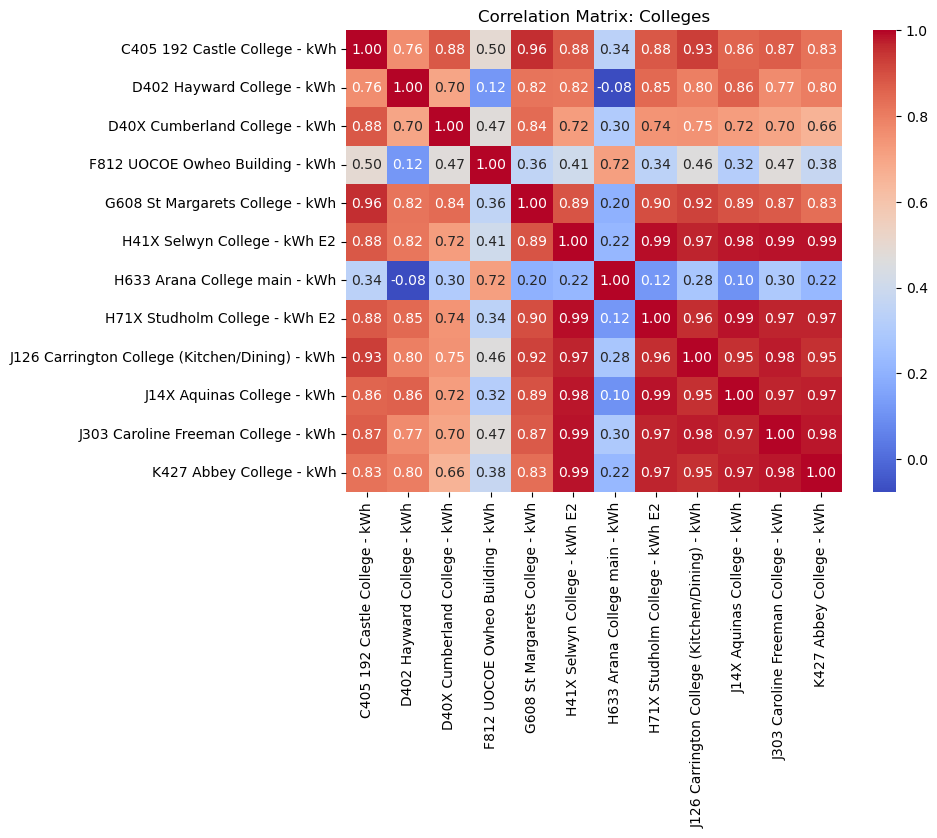

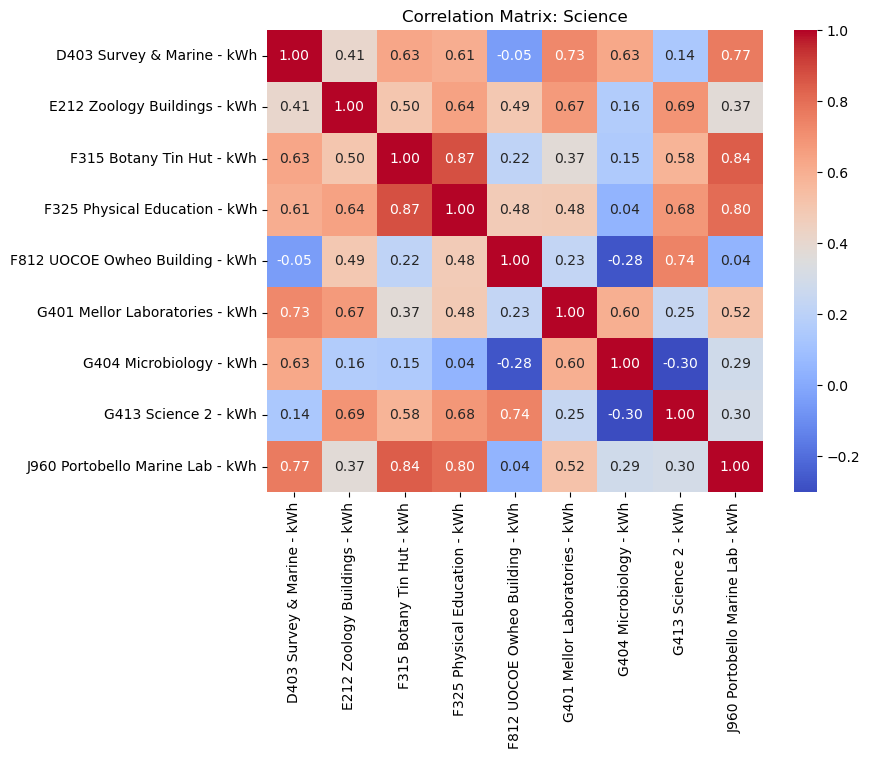

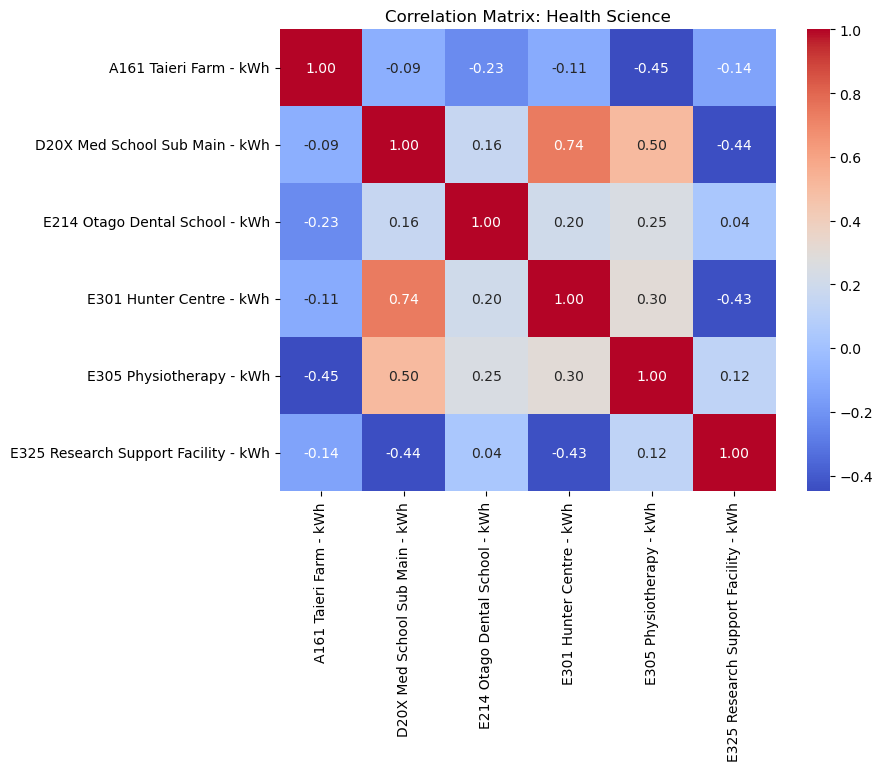


Skipping Humanities - Not enough valid columns for correlation analysis.

Skipping Commerce - Not enough valid columns for correlation analysis.

Skipping Total Electricity - Not enough valid columns for correlation analysis.

Skipping ITS Servers - Not enough valid columns for correlation analysis.


In [16]:
# Perform correlation analysis for each group and plot heatmaps
for group_name, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    
    if len(available_columns) > 1:  # Only process groups with more than one valid column
        plt.figure(figsize=(8,6))
        corr_matrix = stream_data_filtered[available_columns].corr(numeric_only=True)
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Matrix: {group_name}")
        plt.show()
    else:
        print(f"\nSkipping {group_name} - Not enough valid columns for correlation analysis.")


🔹 Analyzing Libraries Group


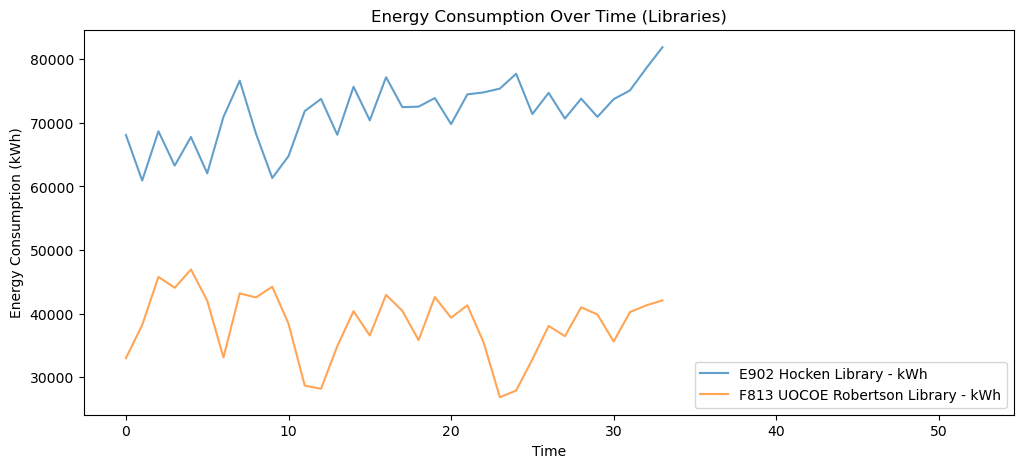

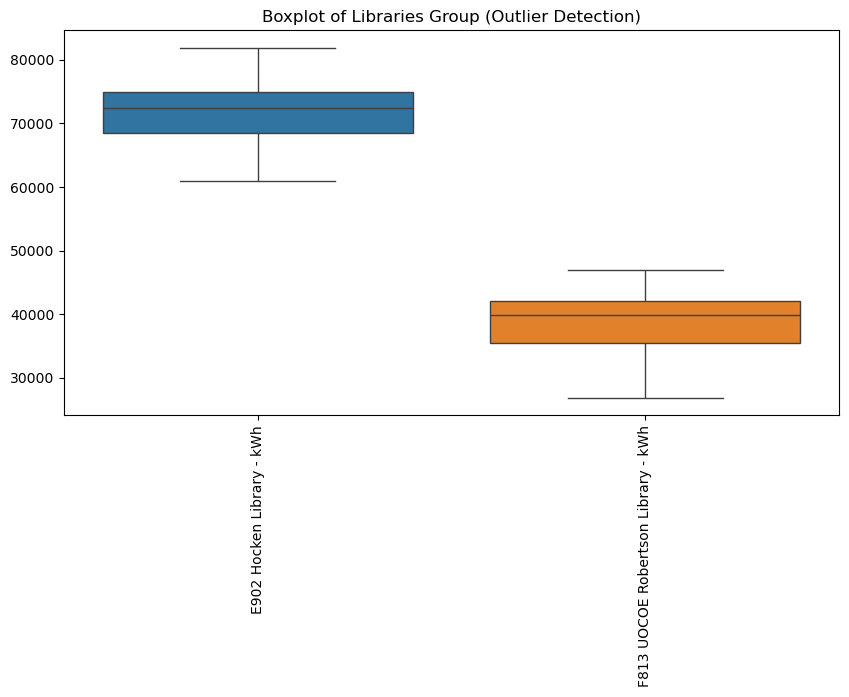

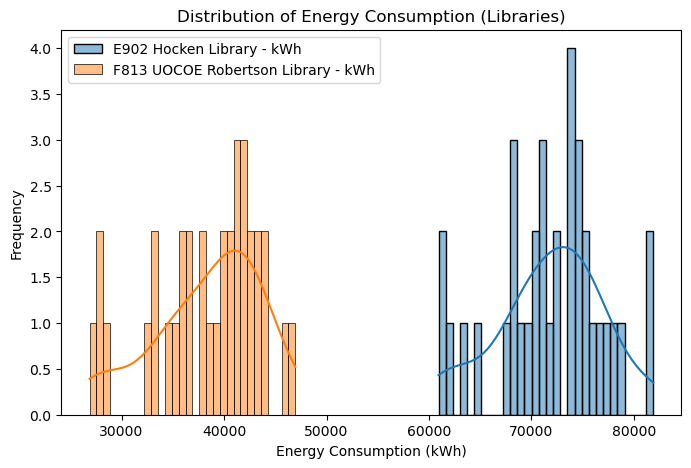

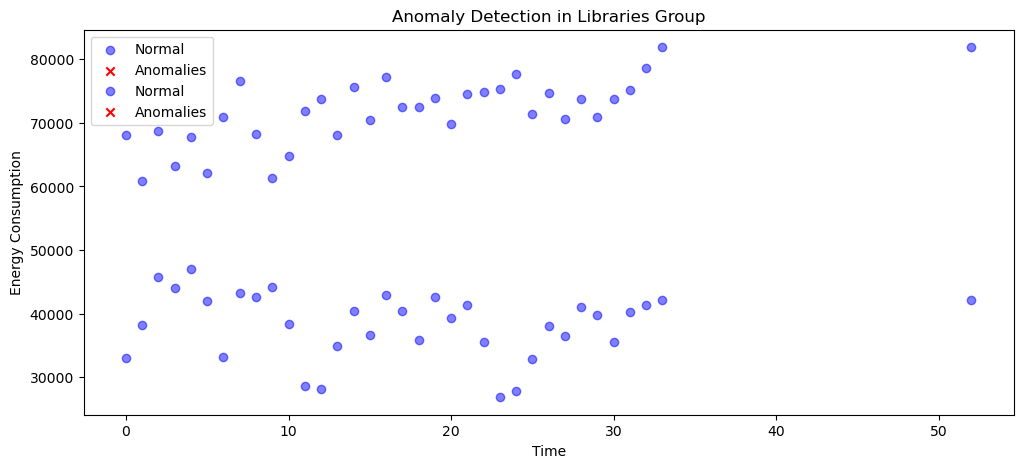


🔹 Analyzing Colleges Group


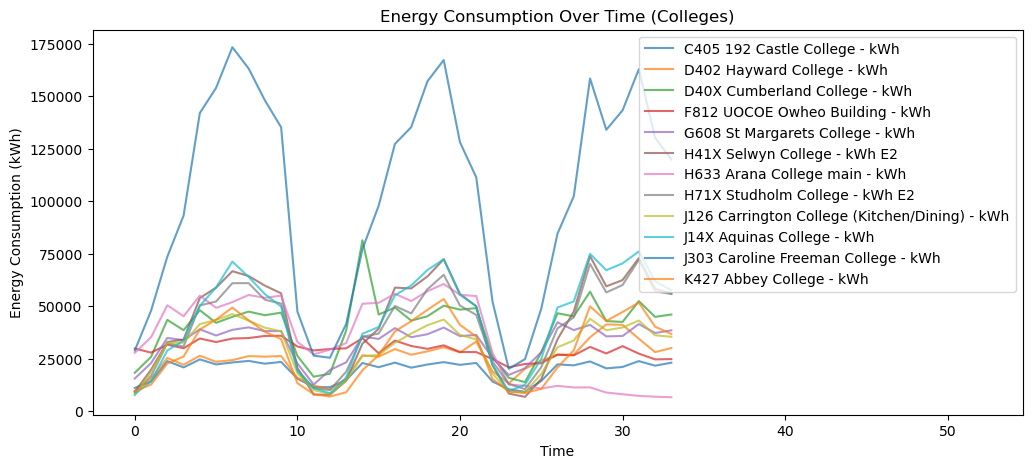

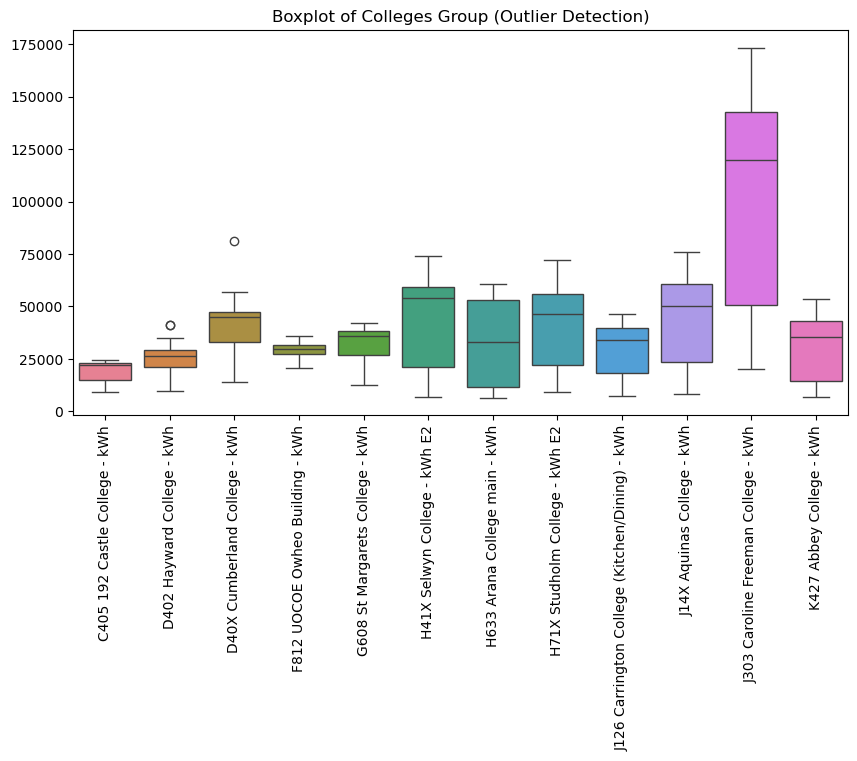

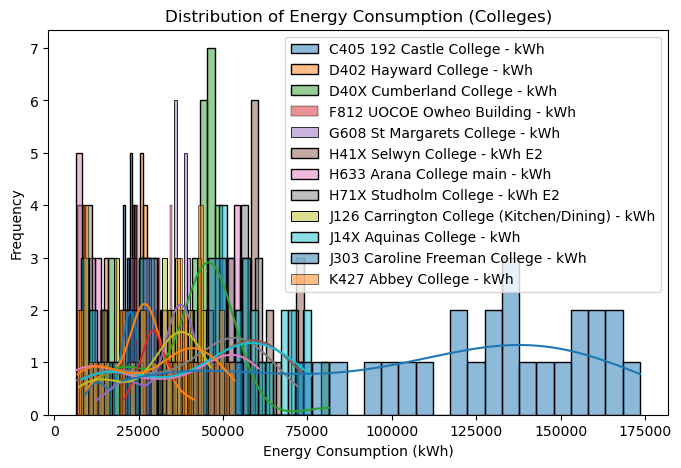

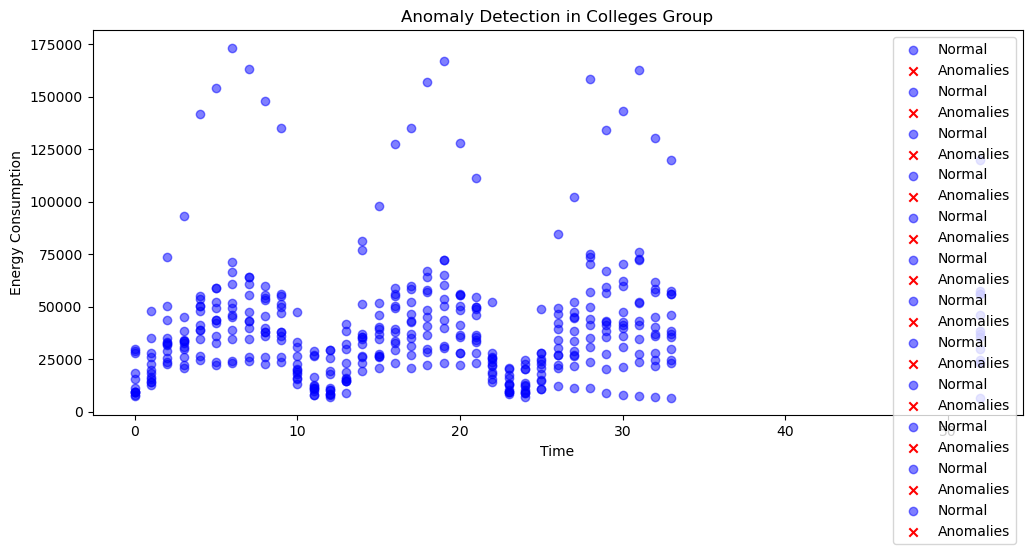


🔹 Analyzing Science Group


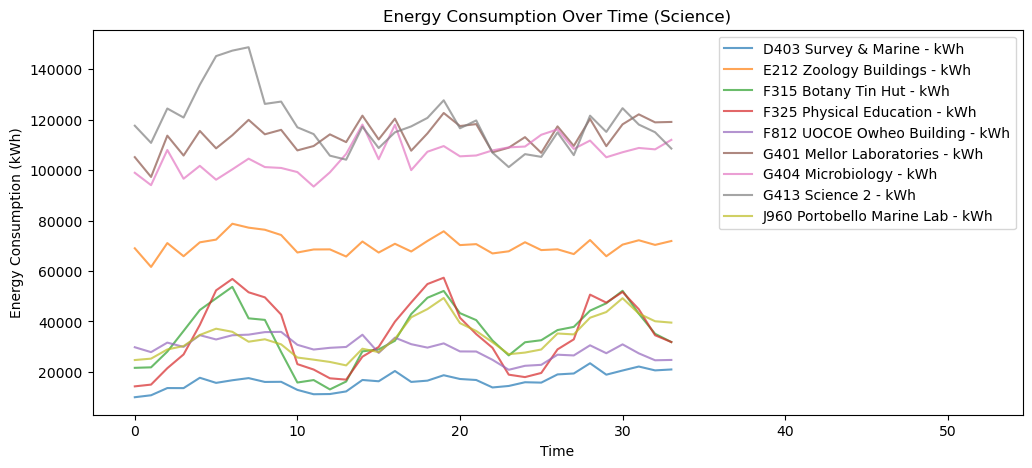

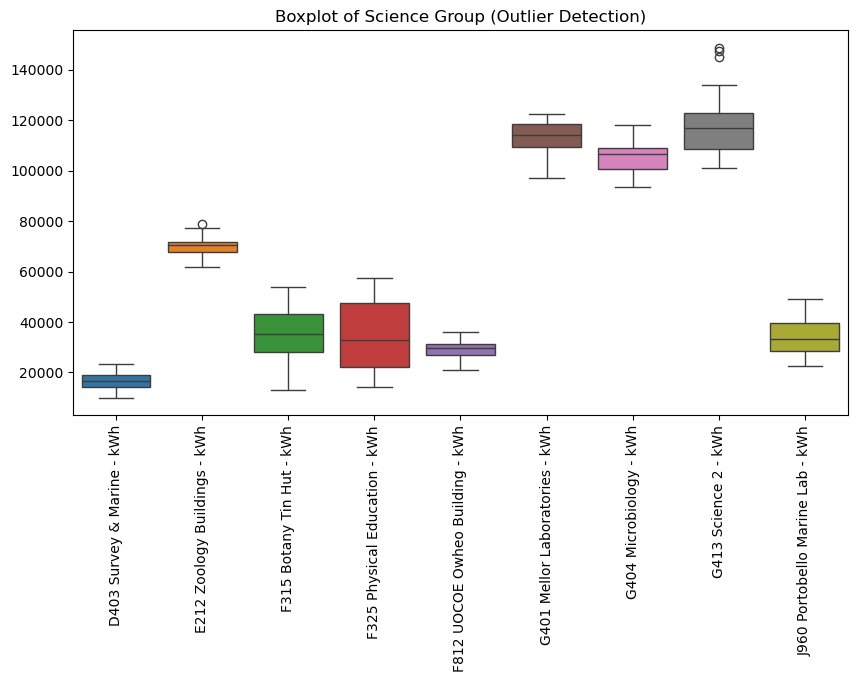

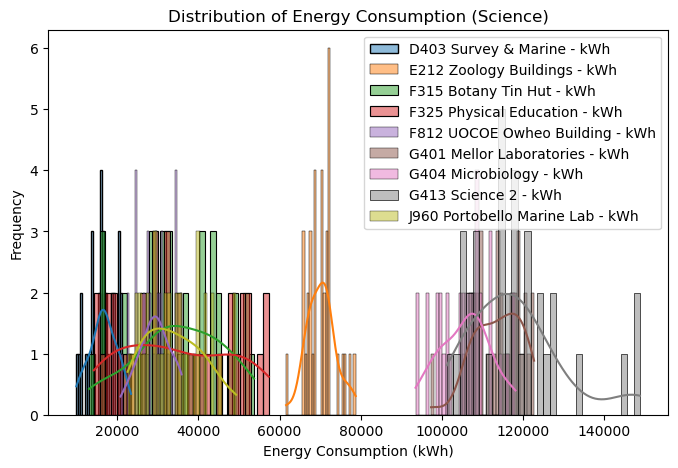

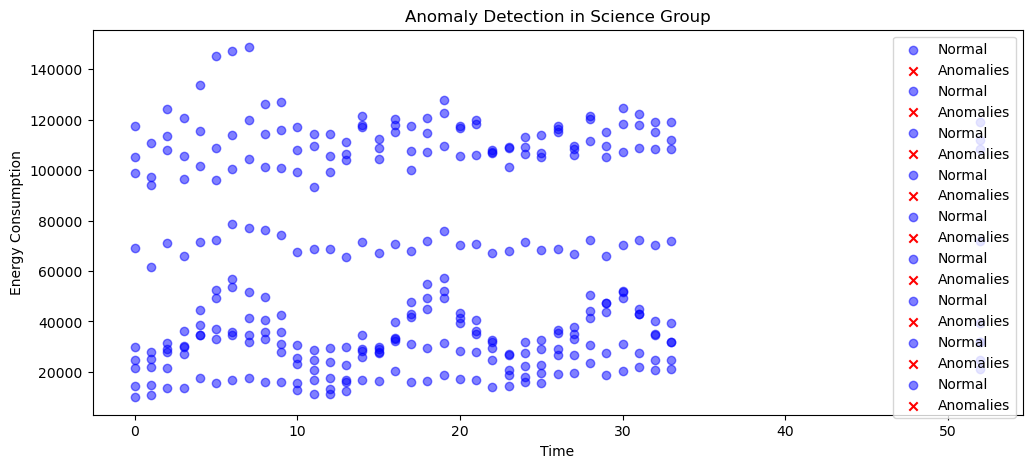


🔹 Analyzing Health Science Group


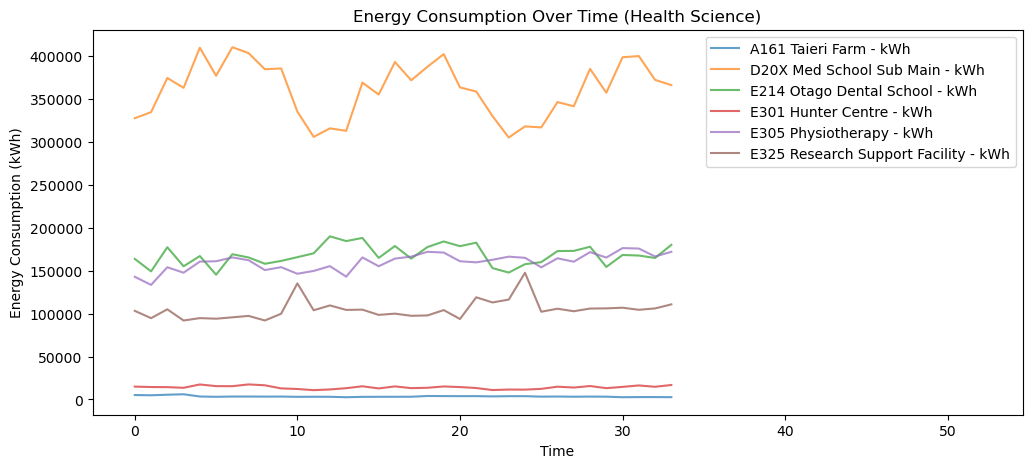

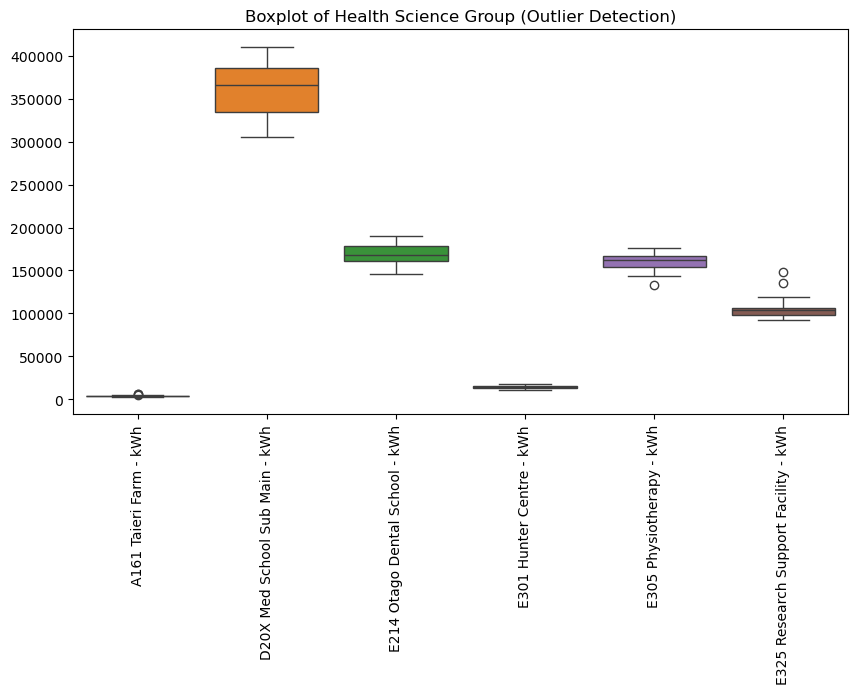

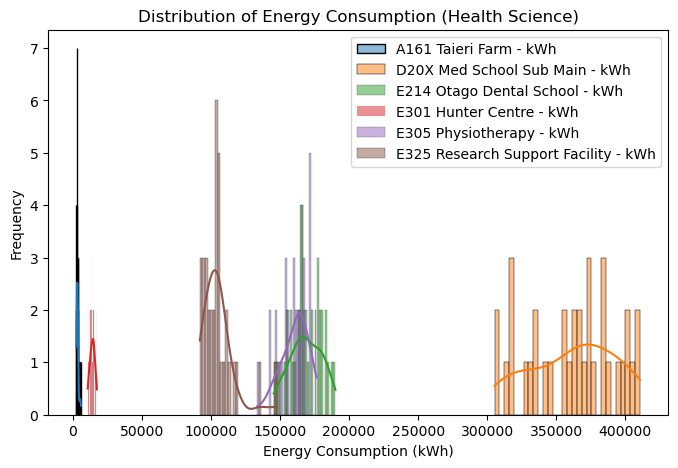

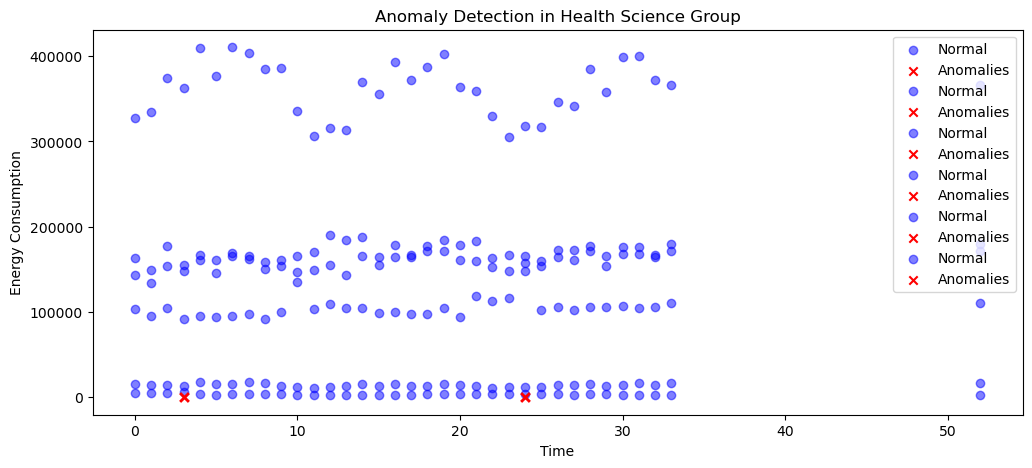


Skipping Humanities - Not enough valid columns for analysis.

Skipping Commerce - Not enough valid columns for analysis.

Skipping Total Electricity - Not enough valid columns for analysis.

Skipping ITS Servers - Not enough valid columns for analysis.


In [17]:
# Iterate over each group and perform analyses
for group_name, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]

    if len(available_columns) > 1:  # Only process groups with more than one valid column
        print(f"\n🔹 Analyzing {group_name} Group")

        # -------  Time Series Trend Analysis ---------
        plt.figure(figsize=(12,5))
        for col in available_columns:
            plt.plot(stream_data_filtered.index, stream_data_filtered[col], label=col, alpha=0.7)
        plt.xlabel("Time")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Over Time ({group_name})")
        plt.legend()
        plt.show()

        # ------- 🚨 Boxplot for Outlier Detection ---------
        plt.figure(figsize=(10,5))
        sns.boxplot(data=stream_data_filtered[available_columns])
        plt.xticks(rotation=90)
        plt.title(f"Boxplot of {group_name} Group (Outlier Detection)")
        plt.show()

        # ------- 📉 Histogram for Distribution ---------
        plt.figure(figsize=(8,5))
        for col in available_columns:
            sns.histplot(stream_data_filtered[col], bins=30, kde=True, label=col, alpha=0.5)
        plt.xlabel("Energy Consumption (kWh)")
        plt.ylabel("Frequency")
        plt.title(f"Distribution of Energy Consumption ({group_name})")
        plt.legend()
        plt.show()

        # ------- 🔍 Anomaly Detection using Z-score ---------
        z_scores = stream_data_filtered[available_columns].apply(lambda x: (x - x.mean()) / x.std())
        anomalies = z_scores[(z_scores.abs() > 3).any(axis=1)]

        # Plot anomalies
        plt.figure(figsize=(12,5))
        for col in available_columns:
            plt.scatter(stream_data_filtered.index, stream_data_filtered[col], label="Normal", color='blue', alpha=0.5)
            plt.scatter(anomalies.index, anomalies[col], color='red', label="Anomalies", marker='x')
        plt.xlabel("Time")
        plt.ylabel("Energy Consumption")
        plt.title(f"Anomaly Detection in {group_name} Group")
        plt.legend()
        plt.show()

    else:
        print(f"\nSkipping {group_name} - Not enough valid columns for analysis.")

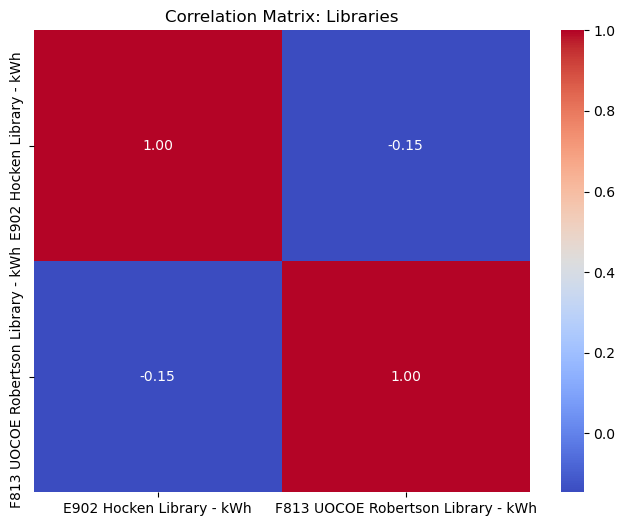

In [18]:
# Libraries Group
libraries_cols = [
    "E902 Hocken Library - kWh", "F813 UOCOE Robertson Library - kWh",
    "D203 Sayers (at Adams) - kWh", "F813 Bill Robertson Library - kWh",
    "F419 ISB West Excludir - kWh", "F505 Richardson Library - kWh"
]

available_libraries = [col for col in libraries_cols if col in stream_data_filtered.columns]

if len(available_libraries) > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = stream_data_filtered[available_libraries].corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Libraries")
    plt.show()
else:
    print("\nSkipping Libraries Group - Not enough valid columns for correlation analysis.")

In [19]:
""" The correlation matrix reveals a weak negative correlation (-0.15) between energy consumption in Hocken Library and Robertson Library, indicating that their energy usage patterns are largely independent. This suggests that factors such as operational schedules, HVAC settings, and occupancy trends may differ between the two libraries, leading to minimal influence on each other’s consumption.Additionally, external factors like weather conditions, infrastructure efficiency,or varying visitor counts might play a more significant role in determining energy usage. To gain deeper insights, further analysis such as time-series trend examination, seasonal variation studies, or clustering similar buildings could help identify key drivers of energy consumption across different facilities."""

' The correlation matrix reveals a weak negative correlation (-0.15) between energy consumption in Hocken Library and Robertson Library, indicating that their energy usage patterns are largely independent. This suggests that factors such as operational schedules, HVAC settings, and occupancy trends may differ between the two libraries, leading to minimal influence on each other’s consumption.Additionally, external factors like weather conditions, infrastructure efficiency,or varying visitor counts might play a more significant role in determining energy usage. To gain deeper insights, further analysis such as time-series trend examination, seasonal variation studies, or clustering similar buildings could help identify key drivers of energy consumption across different facilities.'

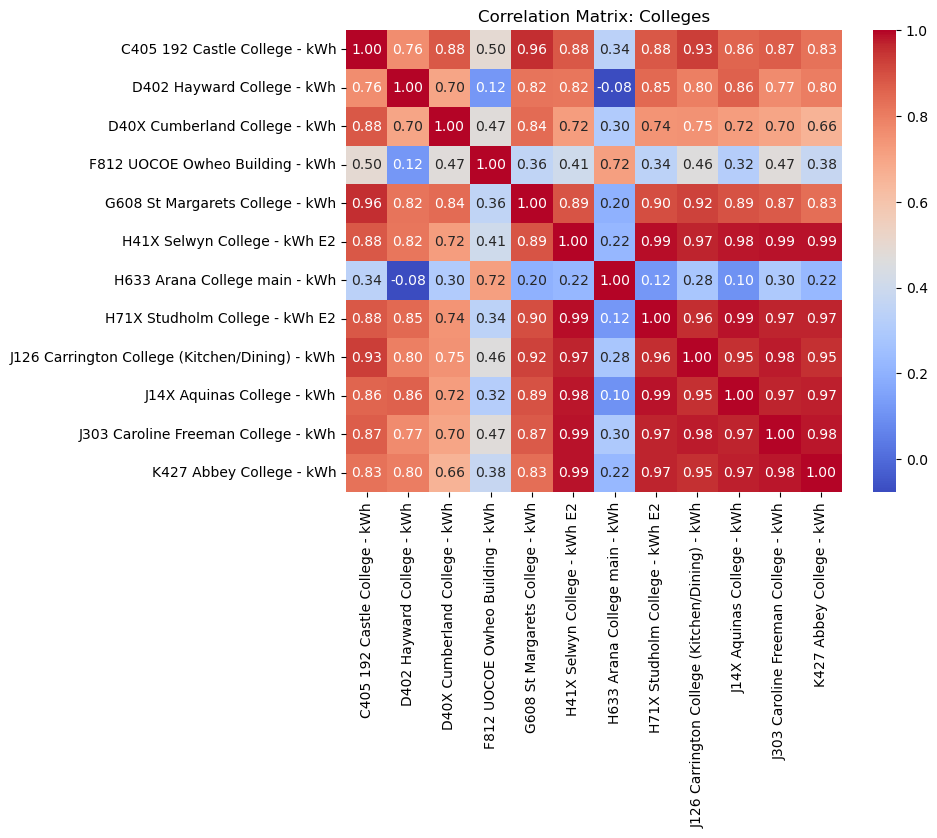

In [20]:
# Colleges Group
colleges_cols = [
    "C405 192 Castle College - kWh", "D402 Hayward College - kWh",
    "D40X Cumberland College - kWh", "F812 UOCOE Owheo Building - kWh",
    "G608 St Margarets College - kWh", "H41X Selwyn College - kWh E2",
    "H633 Arana College main - kWh", "H71X Studholm College - kWh E2",
    "J126 Carrington College (Kitchen/Dining) - kWh",
    "J14X Aquinas College - kWh", "J303 Caroline Freeman College - kWh",
    "K427 Abbey College - kWh"
]

available_colleges = [col for col in colleges_cols if col in stream_data_filtered.columns]

if len(available_colleges) > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = stream_data_filtered[available_colleges].corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Colleges")
    plt.show()
else:
    print("\nSkipping Colleges Group - Not enough valid columns for correlation analysis.")

In [21]:
"""The correlation matrix for colleges reveals strong positive correlations (above 0.8) among most buildings, indicating similar energy consumption patterns, likely due to shared occupancy levels, HVAC systems, or operational schedules. Notably, Selwyn, Studholm, Carrington, Caroline Freeman, and Aquinas Colleges (~0.97-0.99) exhibit highly synchronized energy usage, suggesting similar demand cycles. In contrast, Arana College (-0.08 to 0.34) and UOCOE Owheo Building (~0.12 to 0.50) show weaker correlations, implying distinct energy consumption behaviors, possibly due to different infrastructure or operational strategies. Further analysis through clustering, external factor integration, and forecasting can help optimize energy management and efficiency across these buildings. """

'The correlation matrix for colleges reveals strong positive correlations (above 0.8) among most buildings, indicating similar energy consumption patterns, likely due to shared occupancy levels, HVAC systems, or operational schedules. Notably, Selwyn, Studholm, Carrington, Caroline Freeman, and Aquinas Colleges (~0.97-0.99) exhibit highly synchronized energy usage, suggesting similar demand cycles. In contrast, Arana College (-0.08 to 0.34) and UOCOE Owheo Building (~0.12 to 0.50) show weaker correlations, implying distinct energy consumption behaviors, possibly due to different infrastructure or operational strategies. Further analysis through clustering, external factor integration, and forecasting can help optimize energy management and efficiency across these buildings. '

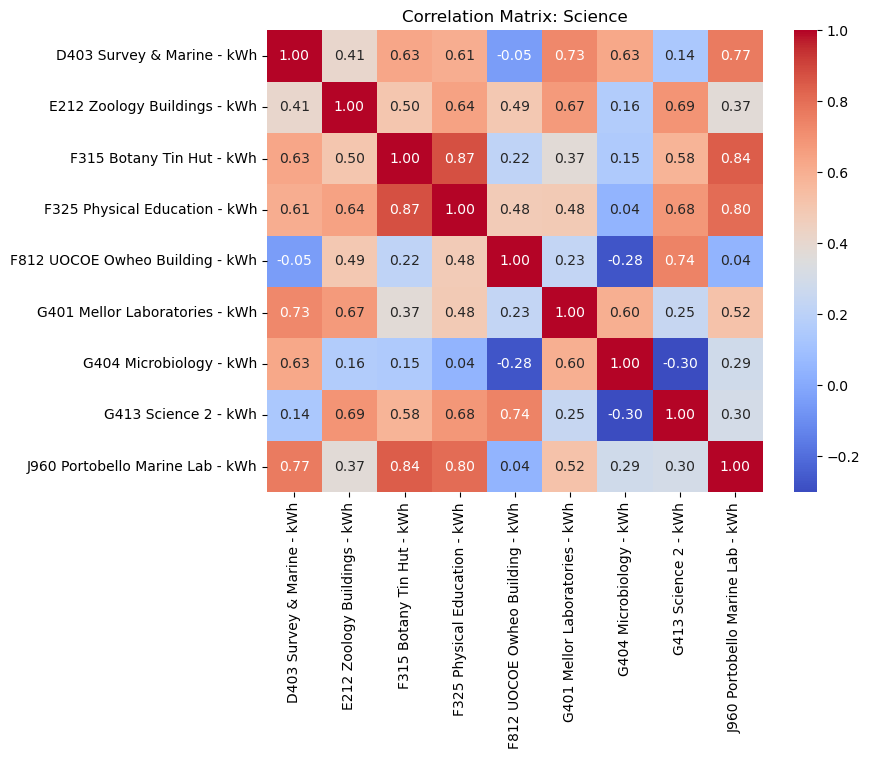

In [22]:
# Science Group
science_cols = [
    "D403 Survey & Marine - kWh", "E212 Zoology Buildings - kWh",
    "F315 Botany Tin Hut - kWh", "F325 Physical Education - kWh",
    "F812 UOCOE Owheo Building - kWh", "G401 Mellor Laboratories - kWh",
    "G404 Microbiology - kWh", "G413 Science 2 - kWh",
    "J960 Portobello Marine Lab - kWh", "G505 Geology north:",
    "G505 Geology south:"
]
available_science = [col for col in science_cols if col in stream_data_filtered.columns]
if len(available_science) > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = stream_data_filtered[available_science].corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Science")
    plt.show()
else:
    print("\nSkipping Science Group - Not enough valid columns for correlation analysis.")

In [23]:
"""The correlation matrix for science buildings reveals strong positive correlations between Botany Tin Hut and Physical Education (~0.87) and Survey & Marine with Portobello Marine Lab (~0.77), suggesting similar energy consumption patterns, likely due to comparable research equipment usage and operational schedules. Additionally, Mellor Laboratories and Survey & Marine (~0.73) indicate aligned energy demands, potentially from high-intensity research activities. In contrast, UOCOE Owheo Building exhibits weak or negative correlations (-0.05 to 0.22) with most buildings, implying distinct operational patterns or different energy infrastructures. Similarly, Microbiology shows mixed correlations (-0.30 to 0.63), indicating fluctuating energy demands possibly due to irregular lab experiments. To optimize energy efficiency, further analysis should explore operational factors, clustering of similar buildings, and seasonal variations in consumption trends. """

'The correlation matrix for science buildings reveals strong positive correlations between Botany Tin Hut and Physical Education (~0.87) and Survey & Marine with Portobello Marine Lab (~0.77), suggesting similar energy consumption patterns, likely due to comparable research equipment usage and operational schedules. Additionally, Mellor Laboratories and Survey & Marine (~0.73) indicate aligned energy demands, potentially from high-intensity research activities. In contrast, UOCOE Owheo Building exhibits weak or negative correlations (-0.05 to 0.22) with most buildings, implying distinct operational patterns or different energy infrastructures. Similarly, Microbiology shows mixed correlations (-0.30 to 0.63), indicating fluctuating energy demands possibly due to irregular lab experiments. To optimize energy efficiency, further analysis should explore operational factors, clustering of similar buildings, and seasonal variations in consumption trends. '

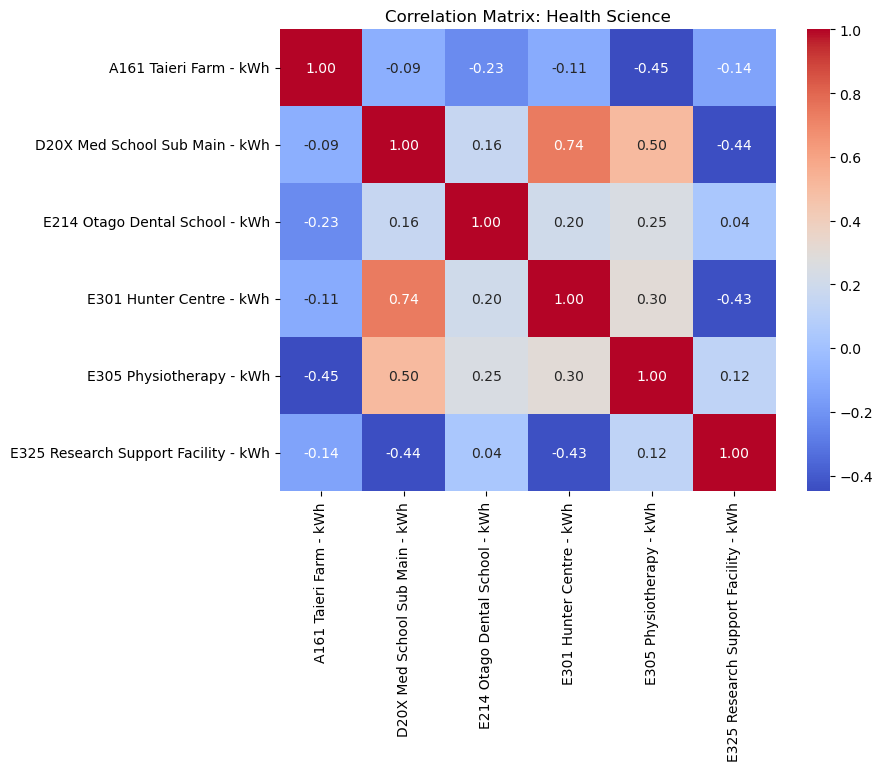

In [24]:
# Health Science Group
health_science_cols = [
    "A161 Taieri Farm - kWh", "D20X Med School Sub Main - kWh",
    "E214 Otago Dental School - kWh", "E301 Hunter Centre - kWh",
    "E305 Physiotherapy - kWh", "E325 Research Support Facility - kWh"
]

available_health_science = [col for col in health_science_cols if col in stream_data_filtered.columns]

if len(available_health_science) > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = stream_data_filtered[available_health_science].corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Health Science")
    plt.show()
else:
    print("\nSkipping Health Science Group - Not enough valid columns for correlation analysis.")

In [25]:
# Humanities Group
humanities_cols = [
    "F9XX College of Education main (Boiler room) - kWh",
    "F518 Arts 1 Submains MSB - kWh", "F516 97 Albany & F517 99 Albany - kWh",
    "F505 1 Richardson Mains - kWh", "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh"
]

available_humanities = [col for col in humanities_cols if col in stream_data_filtered.columns]

if len(available_humanities) > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = stream_data_filtered[available_humanities].corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Humanities")
    plt.show()
else:
    print("\nSkipping Humanities Group - Not enough valid columns for correlation analysis.")
    


Skipping Humanities Group - Not enough valid columns for correlation analysis.


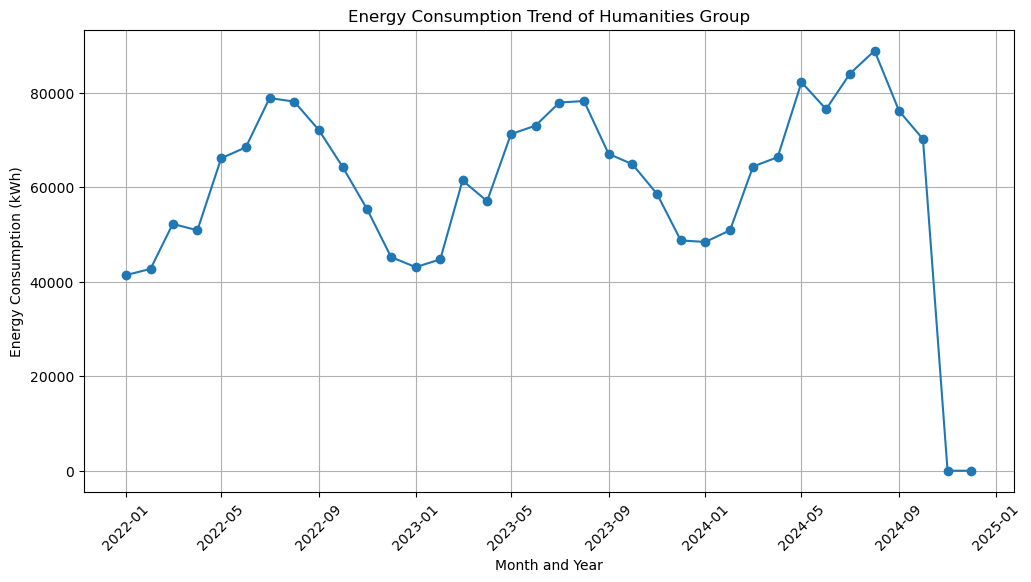

In [26]:
stream_data_filtered['Date'] = pd.to_datetime(stream_data_filtered['Date'], format='%b %y', errors='coerce')

# Drop rows where 'Date' conversion failed
stream_data_filtered = stream_data_filtered.dropna(subset=['Date'])
available_humanities_cols = [col for col in humanities_cols if col in stream_data_filtered.columns]

# Sum the energy consumption across the humanities group and ensure numeric values
stream_data_filtered['Humanities Total - kWh'] = pd.to_numeric(
    stream_data_filtered[available_humanities_cols].sum(axis=1), errors='coerce'
)

# Sort the dataframe by date
stream_data_filtered = stream_data_filtered.sort_values(by='Date')

# Plot the energy consumption trend
plt.figure(figsize=(12, 6))
plt.plot(stream_data_filtered['Date'], stream_data_filtered['Humanities Total - kWh'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Month and Year")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Trend of Humanities Group")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

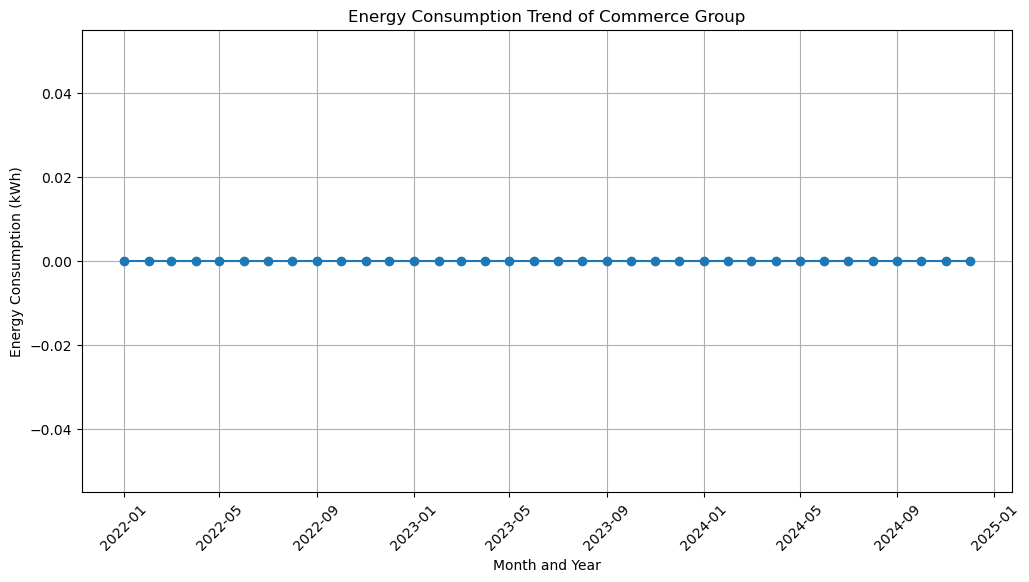

In [27]:
commerce_cols = [
    "F506 Commerce (Main) - kWh", "F511 Commerce (Annex) - kWh",
    "F512 Commerce (Castle) - kWh", "F513 Commerce (Wall St) - kWh"
]

available_commerce_cols = [col for col in commerce_cols if col in stream_data_filtered.columns]

# Sum the energy consumption across the commerce group and ensure numeric values
stream_data_filtered['Commerce Total - kWh'] = pd.to_numeric(
    stream_data_filtered[available_commerce_cols].sum(axis=1), errors='coerce'
)

# Sort the dataframe by date
stream_data_filtered = stream_data_filtered.sort_values(by='Date')

# Plot the energy consumption trend for Commerce Group
plt.figure(figsize=(12, 6))
plt.plot(stream_data_filtered['Date'], stream_data_filtered['Commerce Total - kWh'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Month and Year")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Trend of Commerce Group")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

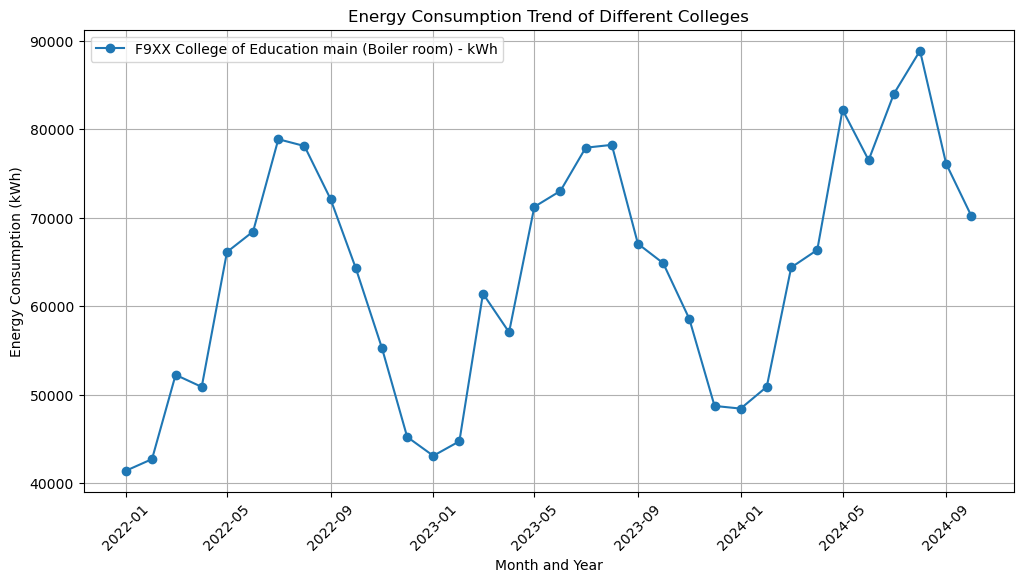

In [28]:
college_cols = [
    "F9XX College of Education main (Boiler room) - kWh",
    "F518 Arts 1 Submains MSB - kWh",
    "F516 97 Albany & F517 99 Albany - kWh",
    "F505 1 Richardson Mains - kWh",
    "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh",
    "F506 Commerce (Main) - kWh",
    "F511 Commerce (Annex) - kWh",
    "F512 Commerce (Castle) - kWh",
    "F513 Commerce (Wall St) - kWh"
]

# Check if the columns exist in the dataset
available_college_cols = [col for col in college_cols if col in stream_data_filtered.columns]

# Sort the dataframe by date
stream_data_filtered = stream_data_filtered.sort_values(by='Date')

# Plot energy consumption trends for each college in different colors
plt.figure(figsize=(12, 6))

for col in available_college_cols:
    plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], marker='o', linestyle='-', label=col)

# Formatting the plot
plt.xlabel("Month and Year")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Trend of Different Colleges")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')

# Show the plot
plt.show()

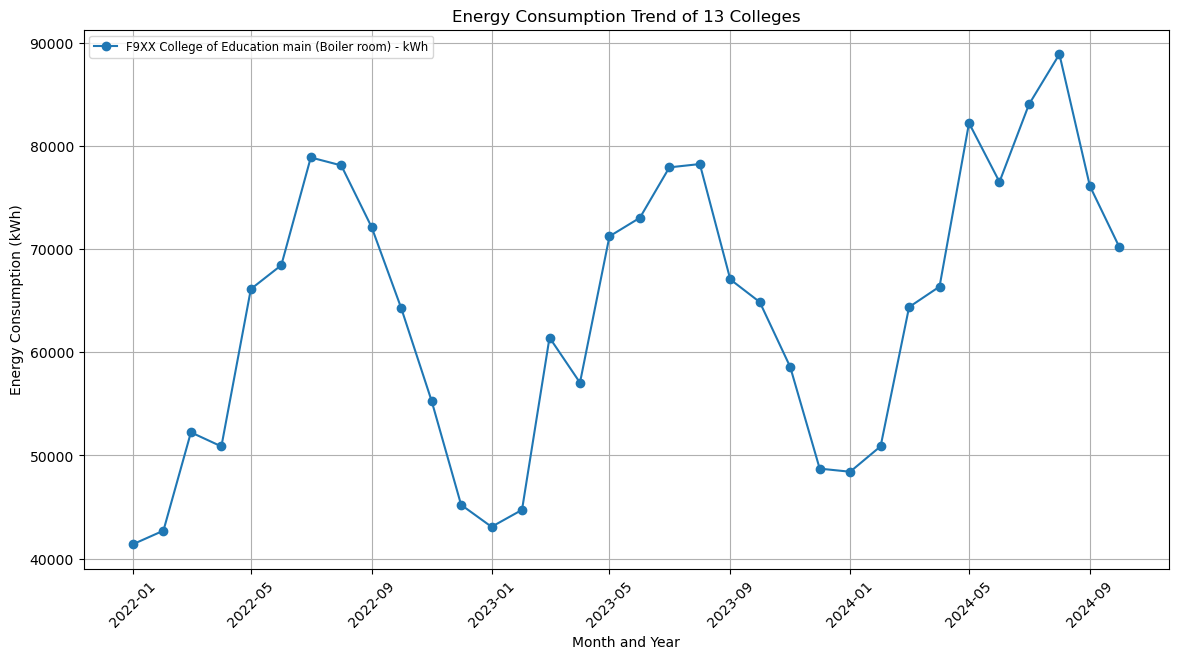

In [29]:
college_cols = [
    "F9XX College of Education main (Boiler room) - kWh",
    "F518 Arts 1 Submains MSB - kWh",
    "F516 97 Albany & F517 99 Albany - kWh",
    "F505 1 Richardson Mains - kWh",
    "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh",
    "F506 Commerce (Main) - kWh",
    "F511 Commerce (Annex) - kWh",
    "F512 Commerce (Castle) - kWh",
    "F513 Commerce (Wall St) - kWh",
    "F601 Science (Main) - kWh",
    "F602 Science (Annex) - kWh",
    "F603 Science (Research) - kWh",
    "F604 Science (Teaching) - kWh"
]

# Check if the columns exist in the dataset
available_college_cols = [col for col in college_cols if col in stream_data_filtered.columns]

# Sort the dataframe by date
stream_data_filtered = stream_data_filtered.sort_values(by='Date')

# Plot energy consumption trends for each of the 13 colleges in different colors
plt.figure(figsize=(14, 7))

for col in available_college_cols:
    plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], marker='o', linestyle='-', label=col)

# Formatting the plot
plt.xlabel("Month and Year")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Trend of 13 Colleges")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best', fontsize='small')

# Show the plot
plt.show()

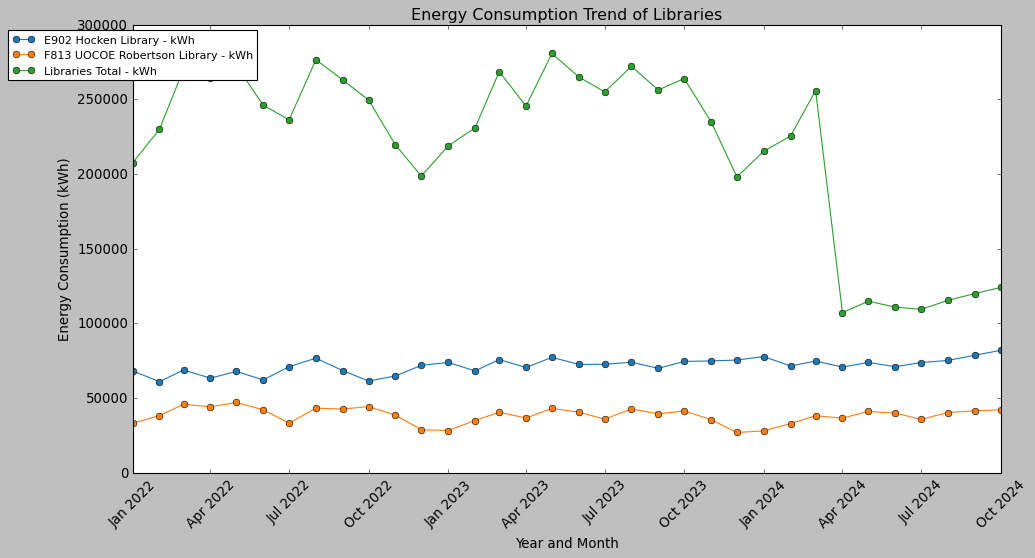

In [30]:
library_cols = [
    "E902 Hocken Library - kWh",
    "F813 UOCOE Robertson Library - kWh",
    "Libraries Total - kWh"
]

# Filter only the columns that exist in the dataset
available_library_cols = [col for col in library_cols if col in stream_data_filtered.columns]

# Convert library energy consumption columns to numeric
for col in available_library_cols:
    stream_data_filtered[col] = pd.to_numeric(stream_data_filtered[col], errors='coerce')

# Set a plain white background
plt.style.use('classic')

# Define a dark color palette for better contrast
dark_palette = sns.color_palette("tab10", len(available_library_cols))  # Using "tab10" for distinct colors

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot energy consumption trends for each of the libraries in different colors
for idx, col in enumerate(available_library_cols):
    plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], 
             marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed

# Formatting the plot
plt.xlabel("Year and Month")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Trend of Libraries")
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize='small', ncol=1, bbox_to_anchor=(-0.15, 1))  # Legend placed to the left

# Show the plot
plt.show()


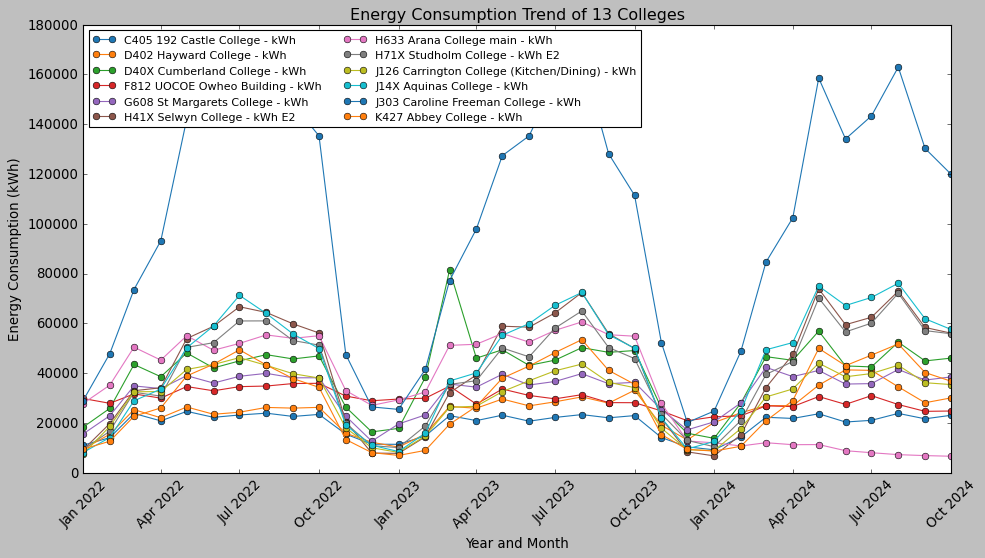

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
college_cols = [
    "C405 192 Castle College - kWh",
    "D402 Hayward College - kWh",
    "D40X Cumberland College - kWh",
    "F812 UOCOE Owheo Building - kWh",
    "G608 St Margarets College - kWh",
    "H41X Selwyn College - kWh E2",
    "H633 Arana College main - kWh",
    "H71X Studholm College - kWh E2",
    "J126 Carrington College (Kitchen/Dining) - kWh",
    "J14X Aquinas College - kWh",
    "J303 Caroline Freeman College - kWh",
    "K427 Abbey College - kWh"
]

# Filter only the columns that exist in the dataset
available_college_cols = [col for col in college_cols if col in stream_data_filtered.columns]
# Set a plain white background
plt.style.use('classic')

# Define a dark color palette for better contrast
dark_palette = sns.color_palette("tab10", len(available_college_cols))  # Using "tab10" for distinct colors

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot energy consumption trends for each of the 13 colleges in different colors
for idx, col in enumerate(available_college_cols):
    plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], 
             marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed

# Formatting the plot
plt.xlabel("Year and Month")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Trend of 13 Colleges")
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize='small', ncol=2)  # Adjust legend to fit all colleges

# Show the plot
plt.show()


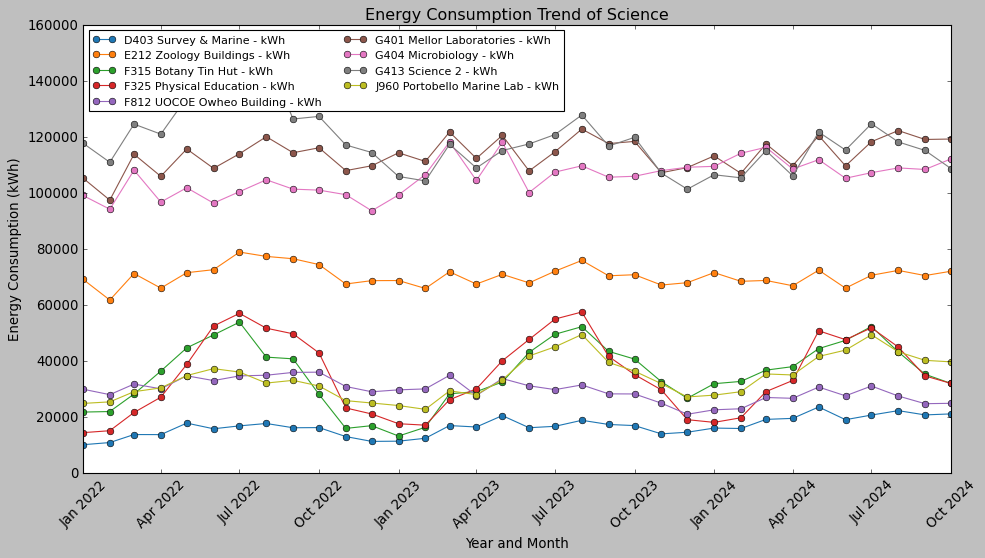

In [32]:
categories = {
    "Science": [
        "D403 Survey & Marine - kWh", "E212 Zoology Buildings - kWh",
        "F315 Botany Tin Hut - kWh", "F325 Physical Education - kWh",
        "F812 UOCOE Owheo Building - kWh", "G401 Mellor Laboratories - kWh",
        "G404 Microbiology - kWh", "G413 Science 2 - kWh",
        "J960 Portobello Marine Lab - kWh", "G505 Geology north:",
        "G505 Geology south:"
    ],
    
}

# Set a plain white background
plt.style.use('classic')

# Iterate over each category to plot individual figures
for category, college_cols in categories.items():
    available_college_cols = [col for col in college_cols if col in stream_data_filtered.columns]
    
    if available_college_cols:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_college_cols))
        
        for idx, col in enumerate(available_college_cols):
            plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Trend of {category}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=2)
        
        # Show the plot
        plt.show()


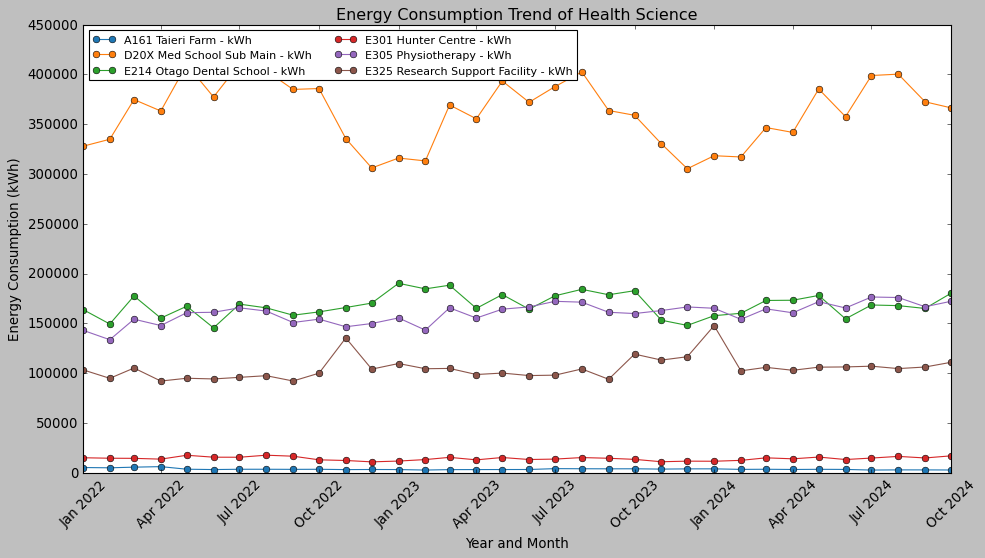

In [33]:
categories = {
   
    "Health Science": [
        "A161 Taieri Farm - kWh", "D20X Med School Sub Main - kWh",
        "E214 Otago Dental School - kWh", "E301 Hunter Centre - kWh",
        "E305 Physiotherapy - kWh", "E325 Research Support Facility - kWh"
    ],

}

# Set a plain white background
plt.style.use('classic')

# Iterate over each category to plot individual figures
for category, college_cols in categories.items():
    available_college_cols = [col for col in college_cols if col in stream_data_filtered.columns]
    
    if available_college_cols:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_college_cols))
        
        for idx, col in enumerate(available_college_cols):
            plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Trend of {category}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=2)
        
        # Show the plot
        plt.show()


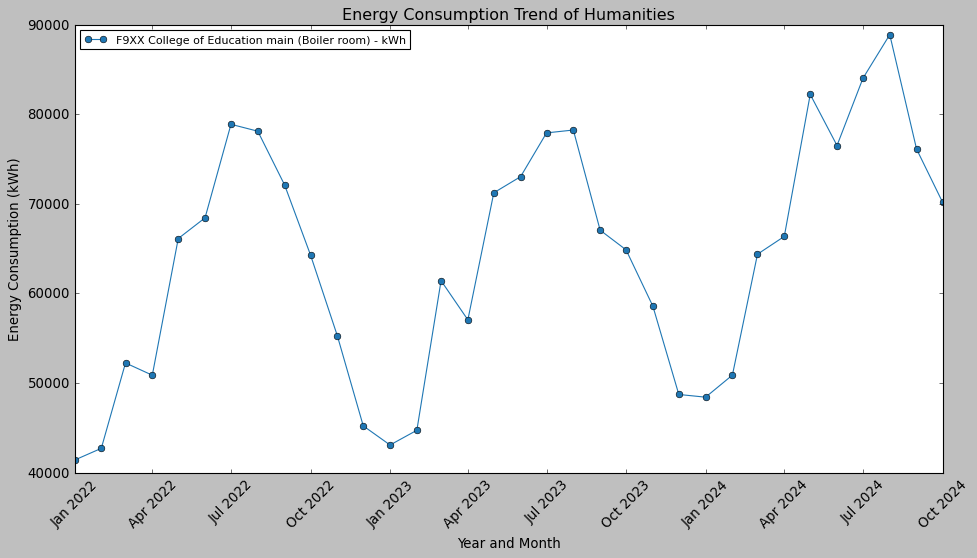

In [34]:
categories = {
   
    "Humanities": [
        "F9XX College of Education main (Boiler room) - kWh",
        "F518 Arts 1 Submains MSB - kWh", "F516 97 Albany & F517 99 Albany - kWh",
        "F505 1 Richardson Mains - kWh", "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh"
    ]
}

# Set a plain white background
plt.style.use('classic')

# Iterate over each category to plot individual figures
for category, college_cols in categories.items():
    available_college_cols = [col for col in college_cols if col in stream_data_filtered.columns]
    
    if available_college_cols:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_college_cols))
        
        for idx, col in enumerate(available_college_cols):
            plt.plot(stream_data_filtered['Date'], stream_data_filtered[col], 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Trend of {category}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=2)
        
        # Show the plot
        plt.show()


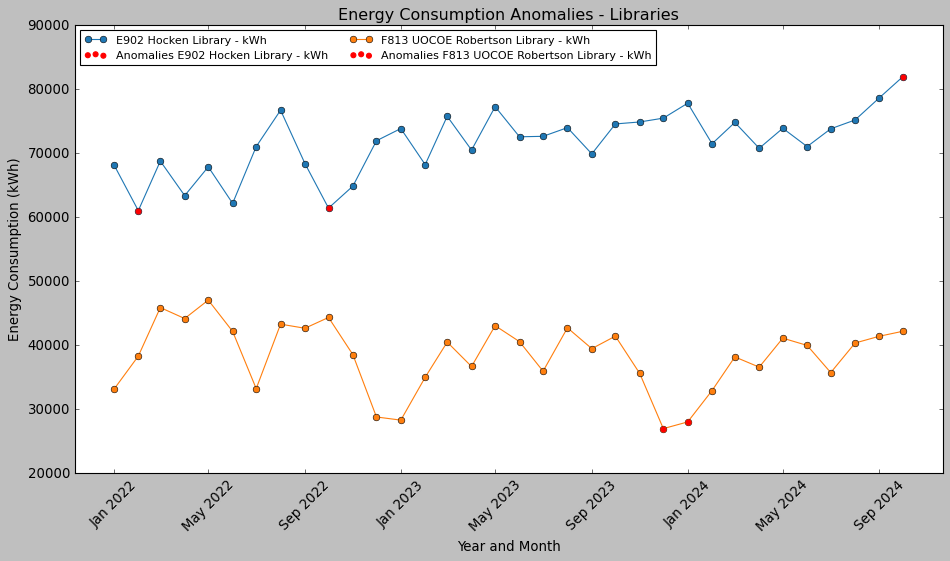

In [35]:
# Define groups and their corresponding column names
groups = {
    "Libraries": [
        "E902 Hocken Library - kWh", "F813 UOCOE Robertson Library - kWh",
        "D203 Sayers (at Adams) - kWh", "F813 Bill Robertson Library - kWh",
        "F419 ISB West Excludir - kWh", "F505 Richardson Library - kWh"
    ],

}

# Set a plain white background
plt.style.use('classic')

# Iterate over each group to plot anomalies separately
for group, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    
    if available_columns:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_columns))
        
        for idx, col in enumerate(available_columns):
            data_series = stream_data_filtered[col]
            mean_val, std_dev = np.mean(data_series), np.std(data_series)
            anomalies = data_series[(data_series > mean_val + 2 * std_dev) | (data_series < mean_val - 2 * std_dev)]
            
            plt.plot(stream_data_filtered['Date'], data_series, 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
            
            # Highlight anomalies
            plt.scatter(stream_data_filtered['Date'][anomalies.index], anomalies, color='red', label=f'Anomalies {col}', zorder=3)
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Anomalies - {group}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=2)
        
        # Show the plot
        plt.show()


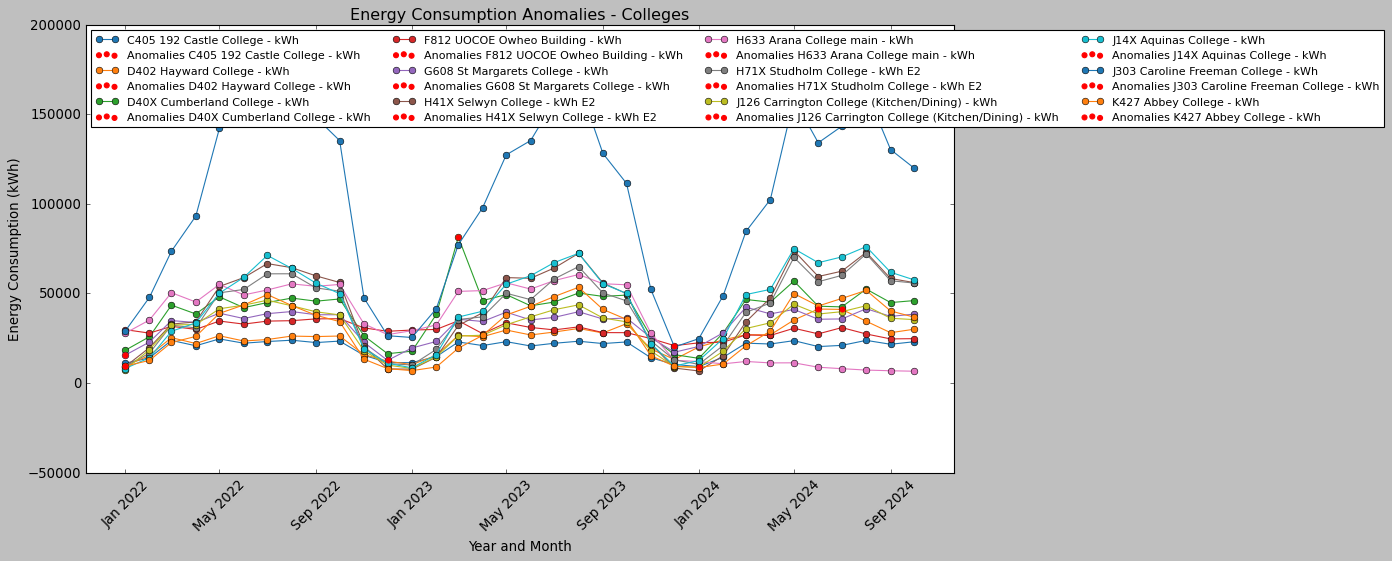

In [36]:
# Define groups and their corresponding column names
groups = {

    "Colleges": [
        "C405 192 Castle College - kWh", "D402 Hayward College - kWh",
        "D40X Cumberland College - kWh", "F812 UOCOE Owheo Building - kWh",
        "G608 St Margarets College - kWh", "H41X Selwyn College - kWh E2",
        "H633 Arana College main - kWh", "H71X Studholm College - kWh E2",
        "J126 Carrington College (Kitchen/Dining) - kWh",
        "J14X Aquinas College - kWh", "J303 Caroline Freeman College - kWh",
        "K427 Abbey College - kWh"
    ],
   
}

# Set a plain white background
plt.style.use('classic')

# Iterate over each group to plot anomalies separately
for group, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    
    if available_columns:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_columns))
        
        for idx, col in enumerate(available_columns):
            data_series = stream_data_filtered[col]
            mean_val, std_dev = np.mean(data_series), np.std(data_series)
            anomalies = data_series[(data_series > mean_val + 2 * std_dev) | (data_series < mean_val - 2 * std_dev)]
            
            plt.plot(stream_data_filtered['Date'], data_series, 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
            
            # Highlight anomalies
            plt.scatter(stream_data_filtered['Date'][anomalies.index], anomalies, color='red', label=f'Anomalies {col}', zorder=3)
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Anomalies - {group}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=4)
        
        # Show the plot
        plt.show()

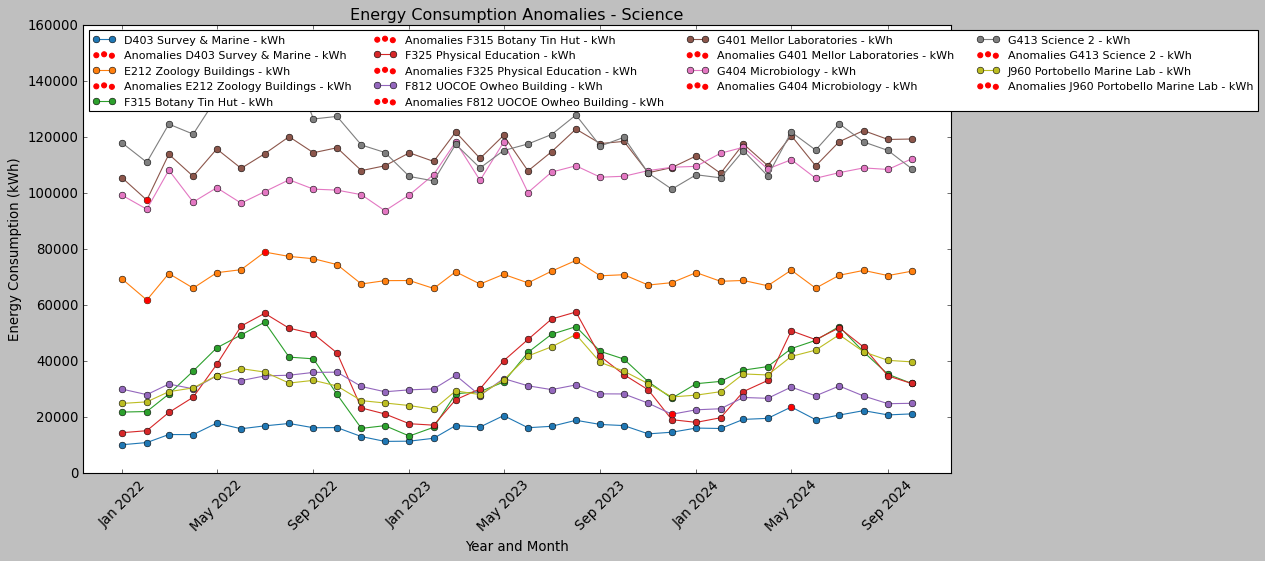

In [37]:
# Define groups and their corresponding column names
groups = {
    
    "Science": [
        "D403 Survey & Marine - kWh", "E212 Zoology Buildings - kWh",
        "F315 Botany Tin Hut - kWh", "F325 Physical Education - kWh",
        "F812 UOCOE Owheo Building - kWh", "G401 Mellor Laboratories - kWh",
        "G404 Microbiology - kWh", "G413 Science 2 - kWh",
        "J960 Portobello Marine Lab - kWh", "G505 Geology north:",
        "G505 Geology south:"
    ],
  
}

# Set a plain white background
plt.style.use('classic')

# Iterate over each group to plot anomalies separately
for group, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    
    if available_columns:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_columns))
        
        for idx, col in enumerate(available_columns):
            data_series = stream_data_filtered[col]
            mean_val, std_dev = np.mean(data_series), np.std(data_series)
            anomalies = data_series[(data_series > mean_val + 2 * std_dev) | (data_series < mean_val - 2 * std_dev)]
            
            plt.plot(stream_data_filtered['Date'], data_series, 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
            
            # Highlight anomalies
            plt.scatter(stream_data_filtered['Date'][anomalies.index], anomalies, color='red', label=f'Anomalies {col}', zorder=3)
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Anomalies - {group}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=4)
        
        # Show the plot
        plt.show()

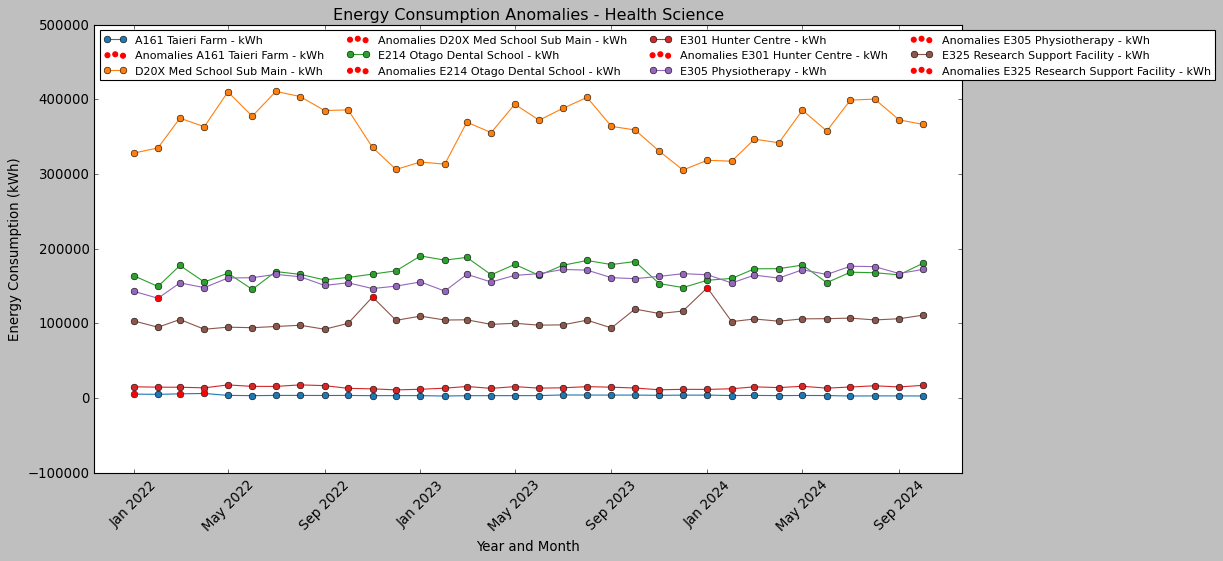

In [38]:
# Define groups and their corresponding column names
groups = {
  
    "Health Science": [
        "A161 Taieri Farm - kWh", "D20X Med School Sub Main - kWh",
        "E214 Otago Dental School - kWh", "E301 Hunter Centre - kWh",
        "E305 Physiotherapy - kWh", "E325 Research Support Facility - kWh"
    ],
   
}

# Set a plain white background
plt.style.use('classic')

# Iterate over each group to plot anomalies separately
for group, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    
    if available_columns:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_columns))
        
        for idx, col in enumerate(available_columns):
            data_series = stream_data_filtered[col]
            mean_val, std_dev = np.mean(data_series), np.std(data_series)
            anomalies = data_series[(data_series > mean_val + 2 * std_dev) | (data_series < mean_val - 2 * std_dev)]
            
            plt.plot(stream_data_filtered['Date'], data_series, 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
            
            # Highlight anomalies
            plt.scatter(stream_data_filtered['Date'][anomalies.index], anomalies, color='red', label=f'Anomalies {col}', zorder=3)
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Anomalies - {group}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=4)
        
        # Show the plot
        plt.show()

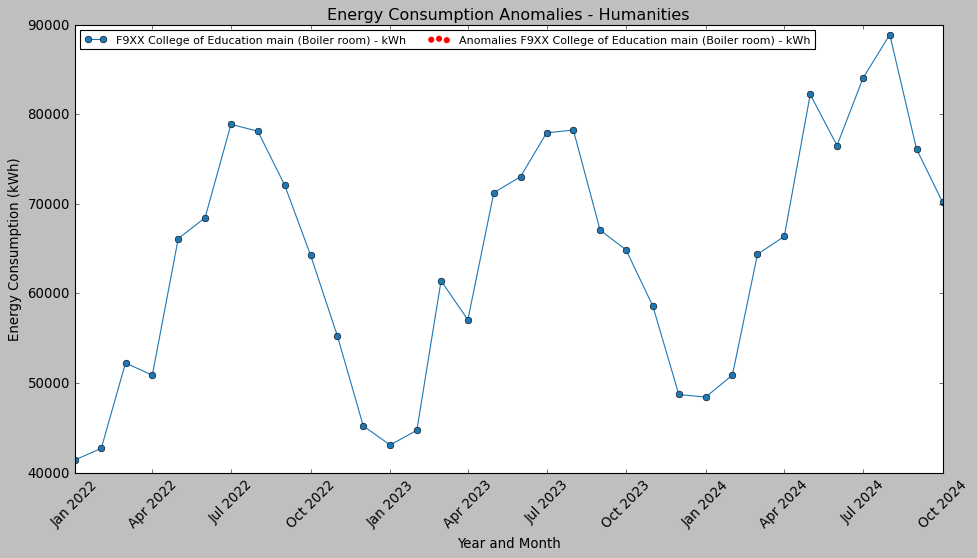

In [39]:
# Define groups and their corresponding column names
groups = {
    
    "Humanities": [
        "F9XX College of Education main (Boiler room) - kWh",
        "F518 Arts 1 Submains MSB - kWh", "F516 97 Albany & F517 99 Albany - kWh",
        "F505 1 Richardson Mains - kWh", "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh"
    ]
}

# Set a plain white background
plt.style.use('classic')

# Iterate over each group to plot anomalies separately
for group, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    
    if available_columns:  # Ensure there are valid columns to plot
        plt.figure(figsize=(14, 7))
        dark_palette = sns.color_palette("tab10", len(available_columns))
        
        for idx, col in enumerate(available_columns):
            data_series = stream_data_filtered[col]
            mean_val, std_dev = np.mean(data_series), np.std(data_series)
            anomalies = data_series[(data_series > mean_val + 2 * std_dev) | (data_series < mean_val - 2 * std_dev)]
            
            plt.plot(stream_data_filtered['Date'], data_series, 
                     marker='o', linestyle='-', color=dark_palette[idx % 10], label=col)  # Cycling colors if needed
            
            # Highlight anomalies
            plt.scatter(stream_data_filtered['Date'][anomalies.index], anomalies, color='red', label=f'Anomalies {col}', zorder=3)
        
        # Formatting the plot
        plt.xlabel("Year and Month")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Anomalies - {group}")
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize='small', ncol=2)
        
        # Show the plot
        plt.show()

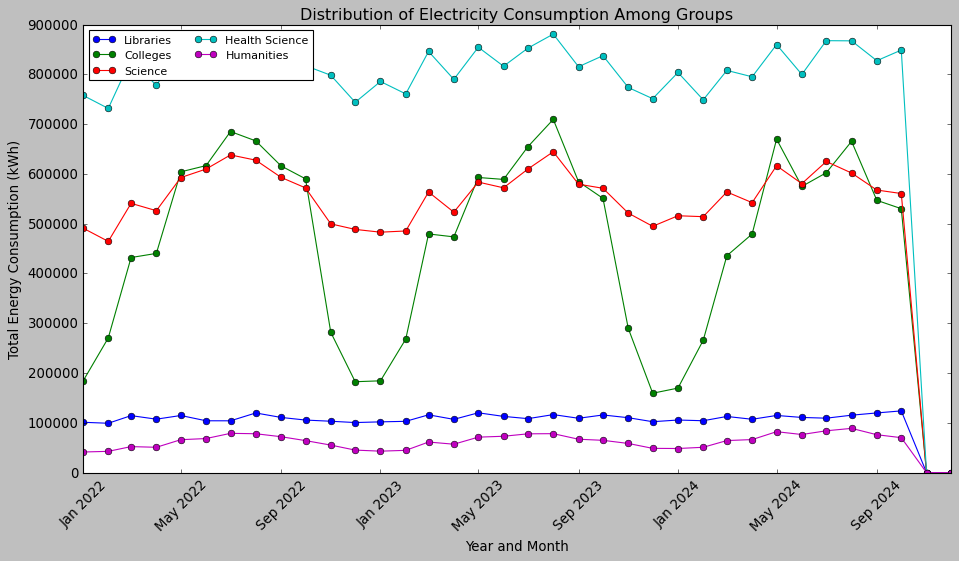

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define groups and their corresponding column names
groups = {
    "Libraries": [
        "E902 Hocken Library - kWh", "F813 UOCOE Robertson Library - kWh",
        "D203 Sayers (at Adams) - kWh", "F813 Bill Robertson Library - kWh",
        "F419 ISB West Excludir - kWh", "F505 Richardson Library - kWh"
    ],
    "Colleges": [
        "C405 192 Castle College - kWh", "D402 Hayward College - kWh",
        "D40X Cumberland College - kWh", "F812 UOCOE Owheo Building - kWh",
        "G608 St Margarets College - kWh", "H41X Selwyn College - kWh E2",
        "H633 Arana College main - kWh", "H71X Studholm College - kWh E2",
        "J126 Carrington College (Kitchen/Dining) - kWh",
        "J14X Aquinas College - kWh", "J303 Caroline Freeman College - kWh",
        "K427 Abbey College - kWh"
    ],
    "Science": [
        "D403 Survey & Marine - kWh", "E212 Zoology Buildings - kWh",
        "F315 Botany Tin Hut - kWh", "F325 Physical Education - kWh",
        "F812 UOCOE Owheo Building - kWh", "G401 Mellor Laboratories - kWh",
        "G404 Microbiology - kWh", "G413 Science 2 - kWh",
        "J960 Portobello Marine Lab - kWh", "G505 Geology north:",
        "G505 Geology south:"
    ],
    "Health Science": [
        "A161 Taieri Farm - kWh", "D20X Med School Sub Main - kWh",
        "E214 Otago Dental School - kWh", "E301 Hunter Centre - kWh",
        "E305 Physiotherapy - kWh", "E325 Research Support Facility - kWh"
    ],
    "Humanities": [
        "F9XX College of Education main (Boiler room) - kWh",
        "F518 Arts 1 Submains MSB - kWh", "F516 97 Albany & F517 99 Albany - kWh",
        "F505 1 Richardson Mains - kWh", "G506/07 Archway buildings (incl. Allen & Marama Hall) - kWh"
    ]
}

# Set a plain white background
plt.style.use('classic')

# Compute and plot distribution of electricity consumption per group
group_totals = {}

for group, columns in groups.items():
    available_columns = [col for col in columns if col in stream_data_filtered.columns]
    if available_columns:
        group_totals[group] = stream_data_filtered[available_columns].sum(axis=1)

# Convert to DataFrame
distribution_df = pd.DataFrame(group_totals)

# Plot distribution
plt.figure(figsize=(14, 7))
for group in distribution_df.columns:
    plt.plot(stream_data_filtered['Date'], distribution_df[group], marker='o', linestyle='-', label=group)

# Formatting the plot
plt.xlabel("Year and Month")
plt.ylabel("Total Energy Consumption (kWh)")
plt.title("Distribution of Electricity Consumption Among Groups")
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize='small', ncol=2)

# Show the plot
plt.show()


C:\Users\sugan\AppData\Local\Temp\ipykernel_6004\436797195.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_df[col] = pd.to_numeric(buildings_df[col], errors='coerce')
C:\Users\sugan\AppData\Local\Temp\ipykernel_6004\436797195.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_df['F_Total'] = buildings_df[f_columns].sum(axis=1)
C:\Users\sugan\AppData\Local\Temp\ipykernel_6004\436797195.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Energy Usage Insights:

F_Buildings:
Total_Usage: 15325086.74
Average_Monthly_Usage: 204334.49
Monthly_Variation: 222481.27

G_Buildings:
Total_Usage: 20049307.25
Average_Monthly_Usage: 267324.10
Monthly_Variation: 289236.24

H_Buildings:
Total_Usage: 37511244.70
Average_Monthly_Usage: 500149.93
Monthly_Variation: 542848.88

Correlation Matrix:
          F_Total   G_Total   H_Total
F_Total  1.000000  0.997049  0.998473
G_Total  0.997049  1.000000  0.998650
H_Total  0.998473  0.998650  1.000000

Average Percentage Contribution:
F Buildings: 9.80%
G Buildings: 12.86%
H Buildings: 24.01%


C:\Users\sugan\AppData\Local\Temp\ipykernel_6004\436797195.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_df['F_Percentage'] = (buildings_df['F_Total'] / total_energy * 100).fillna(0)
C:\Users\sugan\AppData\Local\Temp\ipykernel_6004\436797195.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_df['G_Percentage'] = (buildings_df['G_Total'] / total_energy * 100).fillna(0)
C:\Users\sugan\AppData\Local\Temp\ipykernel_6004\436797195.py:96: SettingWithCopyWarning: 
A value is trying to 

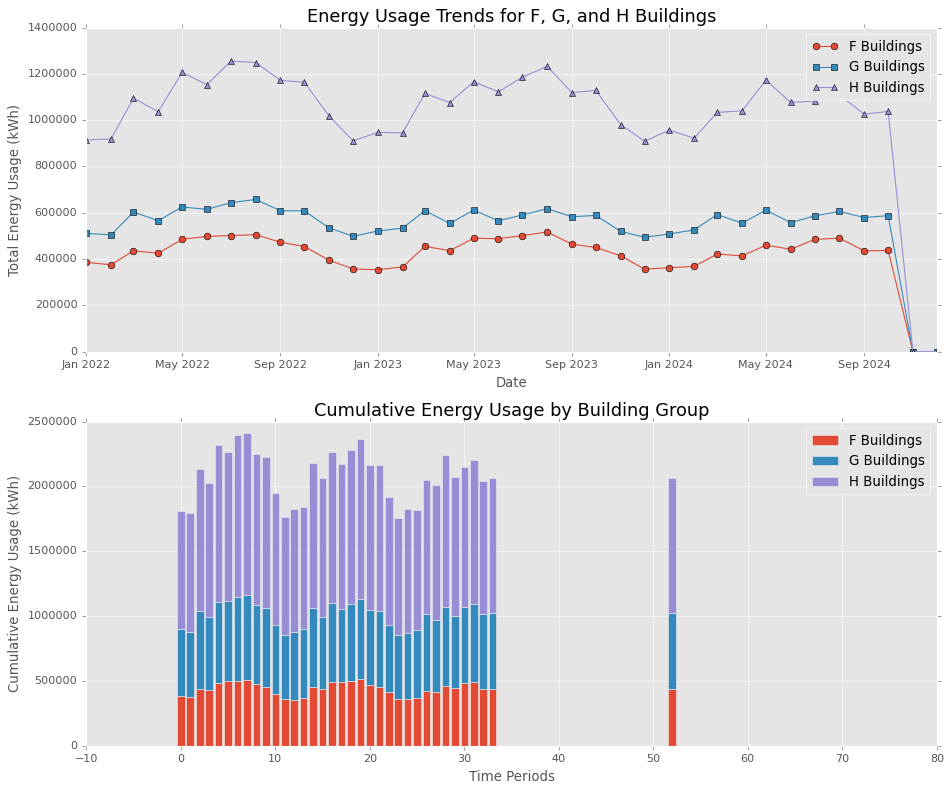

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('stream_data_filtered.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b %y')

# Select columns for buildings F, G, and H
f_columns = [col for col in df.columns if col.startswith('F')]
g_columns = [col for col in df.columns if col.startswith('G')]
h_columns = [col for col in df.columns if col.startswith('H')]

# Combine the selected columns
selected_columns = ['Date'] + f_columns + g_columns + h_columns
buildings_df = df[selected_columns]

# Convert numeric columns, replacing non-numeric values with NaN
for col in buildings_df.columns:
    if col != 'Date':
        buildings_df[col] = pd.to_numeric(buildings_df[col], errors='coerce')

# Calculate total energy usage for each building group
buildings_df['F_Total'] = buildings_df[f_columns].sum(axis=1)
buildings_df['G_Total'] = buildings_df[g_columns].sum(axis=1)
buildings_df['H_Total'] = buildings_df[h_columns].sum(axis=1)

# Set the style for the plots
plt.style.use('ggplot')

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 1. Line Plot of Total Energy Usage
ax1.plot(buildings_df['Date'], buildings_df['F_Total'], label='F Buildings', marker='o')
ax1.plot(buildings_df['Date'], buildings_df['G_Total'], label='G Buildings', marker='s')
ax1.plot(buildings_df['Date'], buildings_df['H_Total'], label='H Buildings', marker='^')
ax1.set_title('Energy Usage Trends for F, G, and H Buildings', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Energy Usage (kWh)', fontsize=12)
ax1.legend()
ax1.grid(True)

# 2. Stacked Bar Plot
building_groups = ['F_Total', 'G_Total', 'H_Total']
stacked_data = buildings_df[building_groups].fillna(0)  # Fill NaN with 0
ax2.bar(range(len(stacked_data)), stacked_data['F_Total'], label='F Buildings')
ax2.bar(range(len(stacked_data)), stacked_data['G_Total'], bottom=stacked_data['F_Total'], label='G Buildings')
ax2.bar(range(len(stacked_data)), stacked_data['H_Total'],
        bottom=stacked_data['F_Total'] + stacked_data['G_Total'], label='H Buildings')
ax2.set_title('Cumulative Energy Usage by Building Group', fontsize=16)
ax2.set_xlabel('Time Periods', fontsize=12)
ax2.set_ylabel('Cumulative Energy Usage (kWh)', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.savefig('building_energy_trends.png')

# Calculate insights with error handling
insights = {
    'F_Buildings': {
        'Total_Usage': buildings_df['F_Total'].sum(),
        'Average_Monthly_Usage': buildings_df['F_Total'].mean(),
        'Monthly_Variation': buildings_df['F_Total'].std()
    },
    'G_Buildings': {
        'Total_Usage': buildings_df['G_Total'].sum(),
        'Average_Monthly_Usage': buildings_df['G_Total'].mean(),
        'Monthly_Variation': buildings_df['G_Total'].std()
    },
    'H_Buildings': {
        'Total_Usage': buildings_df['H_Total'].sum(),
        'Average_Monthly_Usage': buildings_df['H_Total'].mean(),
        'Monthly_Variation': buildings_df['H_Total'].std()
    }
}

# Print insights
print("\nEnergy Usage Insights:")
for building, data in insights.items():
    print(f"\n{building}:")
    for metric, value in data.items():
        print(f"{metric}: {value:.2f}")

# Correlation analysis
correlation_matrix = buildings_df[['F_Total', 'G_Total', 'H_Total']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Calculate percentage contribution
total_energy = buildings_df['F_Total'] + buildings_df['G_Total'] + buildings_df['H_Total']
buildings_df['F_Percentage'] = (buildings_df['F_Total'] / total_energy * 100).fillna(0)
buildings_df['G_Percentage'] = (buildings_df['G_Total'] / total_energy * 100).fillna(0)
buildings_df['H_Percentage'] = (buildings_df['H_Total'] / total_energy * 100).fillna(0)

print("\nAverage Percentage Contribution:")
print(f"F Buildings: {buildings_df['F_Percentage'].mean():.2f}%")
print(f"G Buildings: {buildings_df['G_Percentage'].mean():.2f}%")
print(f"H Buildings: {buildings_df['H_Percentage'].mean():.2f}%")

